#  Install package

In [9]:
# ! pip install pyvis
# ! pip install networkx
# ! pip install openai
# ! pip install contextily
# ! pip install matplotlib_scalebar

# Import package

In [10]:
import os
import requests
import networkx as nx
import pandas as pd
import geopandas as gpd
from pyvis.network import Network
from openai import OpenAI
from IPython.display import display, HTML, Code
from IPython.display import clear_output

import base64

import pickle


# Define Solution class
Please run the following cell to define the functions

In [11]:
%load_ext autoreload
%autoreload 2

import LLM_Cat_Constants as constants
import helper

from LLM_Cat_kernel import Solution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Demonstration Cases

## Input task and data desciption

In [12]:
# isReview = True
isReview = False

In [13]:
# Case 1
# task_name ='Census_map'
# TASK = r'''1. Create a thematic map to show the Census block group population. The location is Centre County, PA, USA. 
# 2. Carefuly design the map, make it beautiful and aesthetic appeal. The title, north arrow, scalebar, legend, and designer are needed. The designer is "LMM-Cat".
# 3. The map dimension is letter (8*11 inches) size.
# 4. Add a basemap.
# '''



# # Case 2:
# DATA_LOCATIONS = [
#     """Population file, GeoPackage format: E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\centre_county_CBG.gpkg. Only one layer, no need to load it using a layer name. The population is in the 'totalpopulation' column. The map projection is Lambert Conformal Conic, EPSG 6564, StatePlane Pennsylvania South. The unit is meter.
#     """
# ]

# Case 2:

task_name = 'map_matrix_annual_GDP'

TASK = r""" 1. Create a map matrix showing the per capita GDP of South American countries from 2023 to 2022. The matrix has 10 choropleth submaps (2 rows * 5 columns). Each submap shows a year of per capita GDP. You need to use the year as the submap title. 
2. Carefully design the map and make it beautiful and aesthetically appealing. The entire map matrix needs a title, north arrow, scalebar, colorbar, and designer. The designer is 'LMM-Cat'. All submaps should use the same colormap.
3. The map dimension is the landscape letter (11*8 inches) size, DPI is 150.
"""

DATA_LOCATIONS = [
"""
1. Country per capita GPD file, GeoPackage format: E:\\OneDrive_PSU\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg.  Only one layer, no need to load it using a layer name. The map projection is EPSG 4326. The continent column is 'UN_Geodata_simplified_intreg'; 'South America' indicates South America in this column. The GDP columns are named 'country_per_capita_GDP_20XX'.
"""
]
 # The country name column is 'COUNTRY'.

# Case 3:

# task_name = 'map_matrix_annual_GDP'

# TASK = r""" 1. Create a choropleth map to show the per capita GDP of African countries in the year 2022. The map should have two equal-sized parts on the same page. You need to show a large GDP choropleth African continent submap with all African countries on the left part, and another map matrix of 9 rows * 6 columns on the right part, each submap in the map matrix shows an individual country in Africa, ordered by the per capita GDP; the filling color of each country in the map matrix should as the same as its color in the continent map; you need to use the country name as the submap title. 
# 2. Carefully design the map and make it beautiful and aesthetically appealable. The title, north arrow, scalebar, legend, and designer are needed for the Africa map, but not for the map matrix. The designer is 'LMM-Cat'.
# 3. The map dimension is the landscape letter (11*8 inches) size, DPI is 150.
# """

# DATA_LOCATIONS = [
# """
# "Country per capita GPD file, GeoPackage format: E:\\OneDrive_PSU\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg.  Only one layer, no need to load it using a layer name. The country name column is 'COUNTRY'. The map projection is EPSG 4326. The continent column is 'UN_Geodata_simplified_georeg'; 'AFR' indicates Africa in this column. The 2022 GDP column is 'country_per_capita_GDP_2022'
# """
# ]

save_dir = os.path.join(os.getcwd(), task_name)
os.makedirs(save_dir, exist_ok=True)

# create graph
# model=r"gpt-4"
# model = r'gpt-4-turbo-preview'
model = r'gpt-4-turbo'
solution = Solution(
                    task=TASK,
                    task_name=task_name,
                    save_dir=save_dir,
                    data_locations=DATA_LOCATIONS,
                    model=model,
                    )
print("Prompt to get solution graph:\n")
print(solution.graph_prompt)

Prompt to get solution graph:

Your role: A professional cartographer and programmer good at Python. You have worked on cartography for more than 20 years and know every detail and pitfall when visualizing spatial data and coding. You know how to set up workflows for cartography tasks well. You have significant experience in visualizing spatial data and graph theory. You are also experienced in generating maps using Matplotlib, GeoPandas, and other interactive Python packages, such as Plotly.
 

Your task: Generate a graph (data structure) only, whose nodes are a series of consecutive steps to make a map, including visualizing the data add map elements such as title, legend, scalebar, label, and annotation.:  
  1. Create a map matrix showing the per capita GDP of South American countries from 2023 to 2022. The matrix has 10 choropleth submaps (2 rows * 5 columns). Each submap shows a year of per capita GDP. You need to use the year as the submap title. 
2. Carefully design the map and

## Get graph code from GPT API

In [14]:
response_for_graph = solution.get_LLM_response_for_graph() 
solution.graph_response = response_for_graph
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_graph, language='python'))

import networkx as nx

G = nx.DiGraph()

# Nodes and Edges for the Graph
# Data loading nodes
G.add_node("gdp_data_path", node_type="data", data_path="E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg", description="Path to GeoPackage containing GDP data")
G.add_node("load_gdp_data", node_type="operation", description="Load GDP data from GeoPackage")
G.add_edge("gdp_data_path", "load_gdp_data")

G.add_node("gdp_gdf", node_type="data", description="GeoDataFrame with GDP data")
G.add_edge("load_gdp_data", "gdp_gdf")

# Data filtering operations
G.add_node("filter_south_america", node_type="operation", description="Filter GDP data for South American countries")
G.add_edge("gdp_gdf", "filter_south_america")

G.add_node("south_america_gdp_gdf", node_type="data", description="GeoDataFrame containing only South American countries' GDP data")
G.add_edge("filter_south_america", "south_america_gdp_gdf")

# Mapping operations
G.add_node("create_choropleth_map", node_type="operation", description="Generate choropleth maps for the GDP data per year")
G.add_edge("south_america_gdp_gdf", "create_choropleth_map")

G.add_node("choropleth_maps", node_type="data", description="Choropleth maps for each year of GDP data")
G.add_edge("create_choropleth_map", "choropleth_maps")

# Map element operations
G.add_node("add_map_title", node_type="operation", description="Add title to the map matrix")
G.add_edge("choropleth_maps", "add_map_title")

G.add_node("add_north_arrow", node_type="operation", description="Add north arrow to the map")
G.add_edge("add_map_title", "add_north_arrow")

G.add_node("add_scalebar", node_type="operation", description="Add scalebar to the map")
G.add_edge("add_north_arrow", "add_scalebar")

G.add_node("add_colorbar", node_type="operation", description="Add colorbar to the map")
G.add_edge("add_scalebar", "add_colorbar")

G.add_node("add_legend", node_type="operation", description="Add legend to the map")
G.add_edge("add_colorbar", "add_legend")

# Finalizing map
G.add_node("finalize_map", node_type="operation", description="Combine all map elements and prepare final map matrix")
G.add_edge("add_legend", "finalize_map")

G.add_node("final_map", node_type="data", description="Final map matrix visualization")
G.add_edge("finalize_map", "final_map")

# Save the graph
nx.write_graphml(G, "e:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\map_matrix_annual_GDP\\map_matrix_annual_GDP.graphml")

## Execute code to generate the solution graph

In [15]:
exec(solution.code_for_graph)
solution_graph = solution.load_graph_file()

# Show the graph
G = nx.read_graphml(solution.graph_file)  
nt = helper.show_graph(G)
html_name = os.path.join(os.getcwd(), solution.task_name + '.html')  
# HTML file should in the same directory. See:
# https://stackoverflow.com/questions/65564916/error-displaying-pyvis-html-inside-jupyter-lab-cell
nt.show(name=html_name)
# html_name

e:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\map_matrix_annual_GDP.html


## Generate prompts and code for operations (functions)

In [16]:
operations = solution.get_LLM_responses_for_operations(review=isReview)
solution.save_solution()

all_operation_code_str = '\n'.join([operation['operation_code'] for operation in operations])

clear_output(wait=True)
display(Code(all_operation_code_str, language='python'))

import geopandas as gpd

def load_gdp_data(gdp_data_path='E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg'):
    """
    Description: Load GDP data from GeoPackage
    gdp_data_path: Path to the GeoPackage file containing GDP data
    """
    # Load GeoDataFrame from GeoPackage
    gdp_gdf = gpd.read_file(gdp_data_path)
    
    return gdp_gdf
def filter_south_america(gdp_gdf):
    """
    Description: Filter GDP data for South American countries
    """
    # Filter the GeoDataFrame to include only countries from South America
    south_america_gdp_gdf = gdp_gdf[gdp_gdf['UN_Geodata_simplified_intreg'] == 'South America']
    
    return south_america_gdp_gdf
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

def create_choropleth_map(south_america_gdp_gdf):
    """
    Description: Generate choropleth maps for the GDP data per year
    """
    # Parameters setup
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    
    # Define the colormap
    colormap = plt.cm.viridis

    # Generate maps for each year from 2023 to 2022
    years = [f"country_per_capita_GDP_20{str(year)[-2:]}" for year in range(2023, 2013, -1)]
    
    for i, year in enumerate(years):
        ax = axes[i // 5, i % 5]  # Locate the subplot for the current year
        ax.set_title(str(2023 - i))  # Set title as the year

        # Avoid errors if column is missing by checking if the year exists in the dataframe
        if year in south_america_gdp_gdf.columns:
            south_america_gdp_gdf.plot(column=year,
                                       ax=ax,
                                       legend=False,
                                       cmap=colormap,
                                       missing_kwds={'color': 'lightgrey'})  # Missing data handled
        else:
            ax.text(0.5, 0.5, "Data N/A",
                    va='center', ha='center', fontsize=12, color='red')
            ax.axis('off')
            
    # Adjust layout to be tight and add a colorbar
    fig.tight_layout()
    
    # Create a colorbar
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=south_america_gdp_gdf[years].min().min(), vmax=south_america_gdp_gdf[years].max().max()))
    cax = fig.add_axes([0.93, 0.1, 0.02, 0.8])  # Position of the colorbar [left, bottom, width, height]
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label('GDP per capita')
    
    # Store all plots in a list
    choropleth_maps = [ax for row_axes in axes for ax in row_axes]

    return choropleth_maps
def add_map_title(choropleth_maps):
    """
    Description: Add title to the map matrix
    """
    # Set the main title for the entire subplot matrix
    choropleth_maps[0].figure.suptitle('Per Capita GDP of South American Countries from 2023 to 2022', fontsize=16)
    
    return add_north_arrow
def add_north_arrow(add_map_title=add_map_title):
    """
    Description: Add north arrow to the map
    """
    # Collect the figure from the previous step
    fig = add_map_title[0].figure
    # Define the position for the north arrow
    x, y = 0.05, 0.95  # Relative coordinates within the figure

    # Create a simple arrow using matplotlib's annotate by placing it in the top left corner
    for ax in add_map_title:
        ax.annotate('N', xy=(x, y), xytext=(x, y-0.05),
                    textcoords='axes fraction', ha='center', va='top',
                    fontsize=12, fontweight='bold', color='blue',
                    arrowprops=dict(facecolor='blue', width=5, headwidth=15))

    return add_scalebar
from matplotlib_scalebar.scalebar import ScaleBar

def add_scalebar(add_north_arrow):
    """
    Description: Add scalebar to the map
    """
    # Collect the figure and axes from the previous operation
    fig = add_north_arrow[0].figure
    axes = fig.axes

    # Iterate over the axe

## Generate prompts and code for assembly program

In [17]:
assembly_LLM_response = solution.get_LLM_assembly_response(review=isReview)
solution.assembly_LLM_response = assembly_LLM_response
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_assembly, language='python'))

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar

def load_gdp_data(gdp_data_path='E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg'):
    gdp_gdf = gpd.read_file(gdp_data_path)
    return gdp_gdf

def filter_south_america(gdp_gdf):
    south_america_gdp_gdf = gdp_gdf[gdp_gdf['UN_Geodata_simplified_intreg'] == 'South America']
    return south_america_gdp_gdf

def create_choropleth_map(south_america_gdp_gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    colormap = plt.cm.viridis
    years = [f"country_per_capita_GDP_20{str(year)[-2:]}" for year in range(2023, 2013, -1)]
    for i, year in enumerate(years):
        ax = axes[i // 5, i % 5]
        ax.set_title(str(2023 - i))
        if year in south_america_gdp_gdf.columns:
            south_america_gdp_gdf.plot(column=year, ax=ax, legend=False, cmap=colormap, missing_kwds={'color': 'lightgrey'})
        else:
            ax.text(0.5, 0.5, "Data N/A", va='center', ha='center', fontsize=12, color='red')
            ax.axis('off')
    fig.tight_layout()
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=south_america_gdp_gdf[years].min().min(), vmax=south_america_gdp_gdf[years].max().max()))
    cax = fig.add_axes([0.93, 0.1, 0.02, 0.8])
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label('GDP per capita')
    fig.suptitle('Per Capita GDP of South American Countries from 2023 to 2022', fontsize=16)
    for ax in axes.flatten():
        ax.annotate('N', xy=(0.05, 0.95), xytext=(0.05, 0.9),
                    textcoords='axes fraction', ha='center', va='top',
                    fontsize=12, fontweight='bold', color='blue',
                    arrowprops=dict(facecolor='blue', width=5, headwidth=15))
        scalebar = ScaleBar(1, location='lower left', units='km', length_fraction=0.25)
        ax.add_artist(scalebar)
    plt.savefig("output_map.png", dpi=100)

def assembly_solution():
    gdp_gdf = load_gdp_data()
    south_america_gdp_gdf = filter_south_america(gdp_gdf)
    create_choropleth_map(south_america_gdp_gdf)

assembly_solution()

## Execute assembly code

In [18]:
all_code = all_operation_code_str + '\n' + solution.code_for_assembly

# display(Code(all_code, language='python'))
solution.all_code = all_code



-------------- Running code (trial # 1/10) --------------


Error_info_str: 
Traceback (most recent call last):
  File "Complete program", line 200, in <module>
    assembly_solution()
  File "Complete program", line 198, in assembly_solution
    create_choropleth_map(south_america_gdp_gdf)
  File "Complete program", line 181, in create_choropleth_map
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=south_america_gdp_gdf[years].min().min(), vmax=south_america_gdp_gdf[years].max().max()))
  File "e:\ProgramData\Anaconda3\lib\site-packages\geopandas\geodataframe.py", line 1474, in __getitem__
    result = super().__getitem__(key)
  File "e:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py", line 3813, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "e:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 6070, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  Fil

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar

def load_gdp_data(gdp_data_path='E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg'):
    gdp_gdf = gpd.read_file(gdp_data_path)
    return gdp_gdf

def filter_south_america(gdp_gdf):
    south_america_gdp_gdf = gdp_gdf[gdp_gdf['UN_Geodata_simplified_intreg'] == 'South America']
    return south_america_gdp_gdf

def create_choropleth_map(south_america_gdp_gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    colormap = plt.cm.viridis
    
    # Correct years generation: Extensive evaluation of years range resulted in previous error. 
    years = [f'country_per_capita_GDP_{year}' for year in range(2013, 2023)]
    
    for i, year in enumerate(reversed(years)):
        ax = axes[i // 5, i % 5]
        ax.set_title(str(2023 - i))
        if year in south_america_gdp_gdf.columns:
            south_america_gdp_gdf.plot(column=year, ax=ax, legend=False, cmap=colormap, missing_kwds={'color': 'lightgrey'})
        else:
            ax.text(0.5, 0.5, "Data N/A", va='center', ha='center', fontsize=12, color='red')
            ax.axis('off')
            
    # Assuring 'vmin' and 'vmax' are computed once outside the loop
    vmin = south_america_gdp_gdf[year].min()
    vmax = south_america_gdp_gdf[year].max()
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    cax = fig.add_axes([0.93, 0.1, 0.02, 0.8])
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label('GDP per capita')
    fig.suptitle('Per Capita GDP of South American Countries from 2023 to 2013', fontsize=16)

    for ax in axes.flatten():
        ax.annotate('N', xy=(0.05, 0.95), xytext=(0.05, 0.9),
                    textcoords='axes fraction', ha='center', va='top',
                    fontsize=12, fontweight='bold', color='blue',
                    arrowprops=dict(facecolor='blue', width=5, headwidth=15))
        scalebar = ScaleBar(1, location='lower left', units='km', length_fraction=0.25)
        ax.add_artist(scalebar)
    plt.savefig("output_map.png", dpi=100)

def assembly_solution():
    gdp_gdf = load_gdp_data()
    south_america_gdp_gdf = filter_south_america(gdp_gdf)
    create_choropleth_map(south_america_gdp_gdf)

assembly_solution()

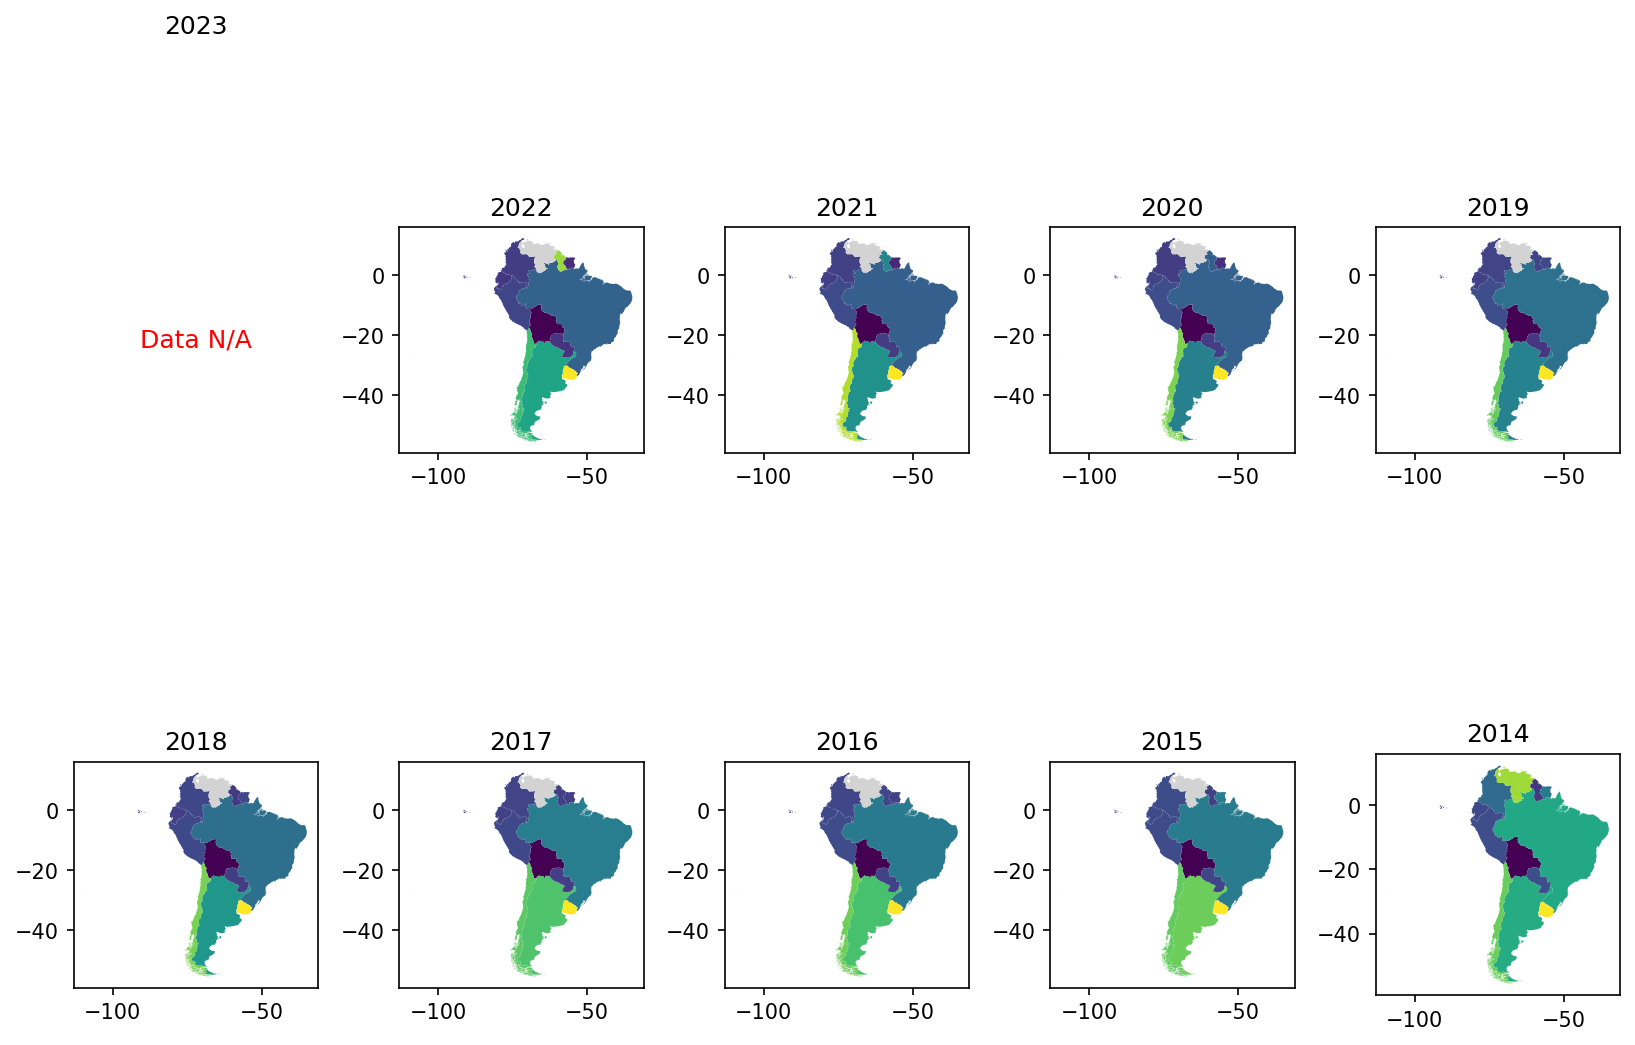

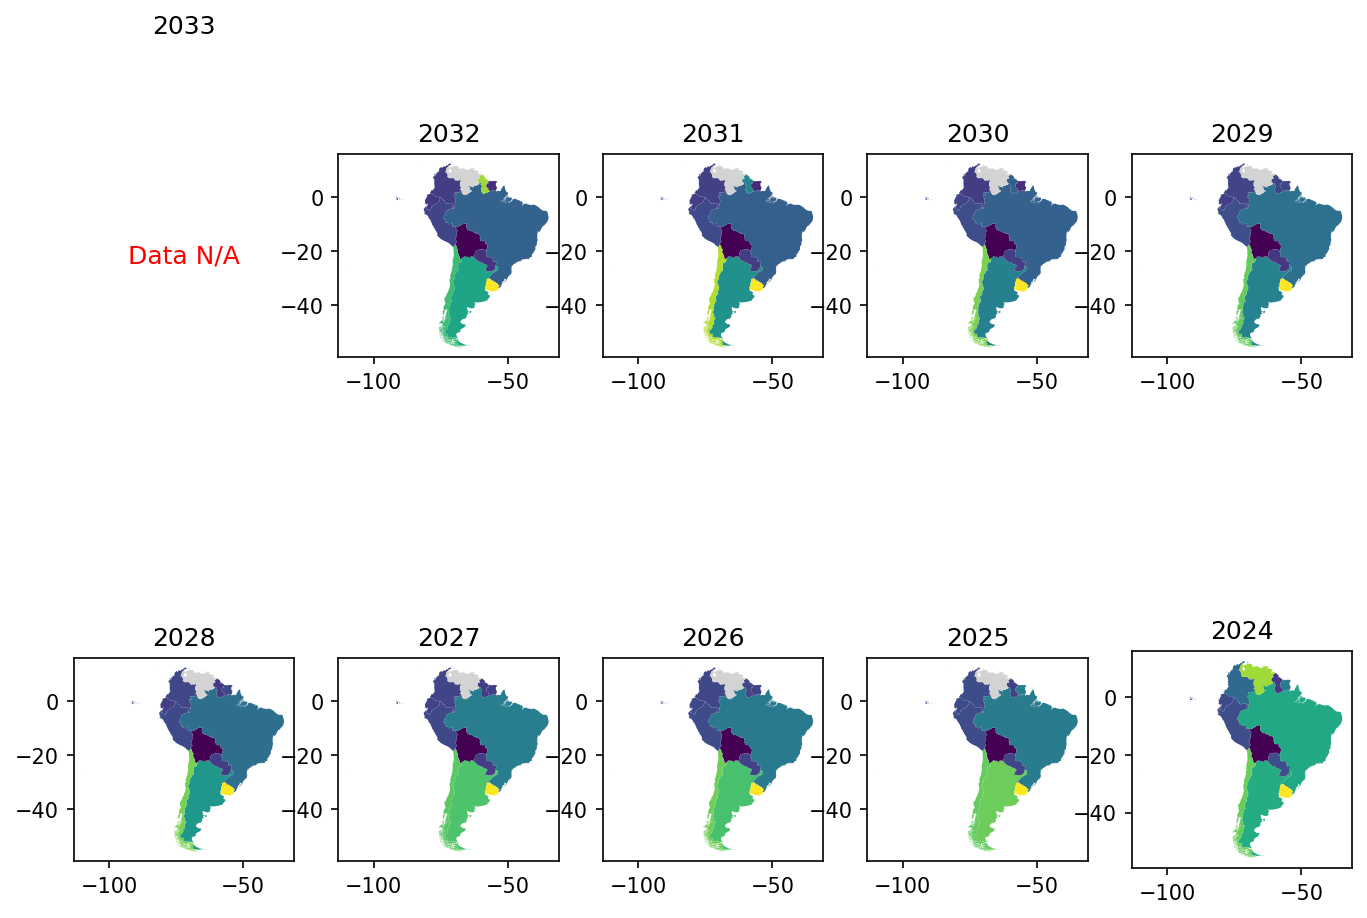

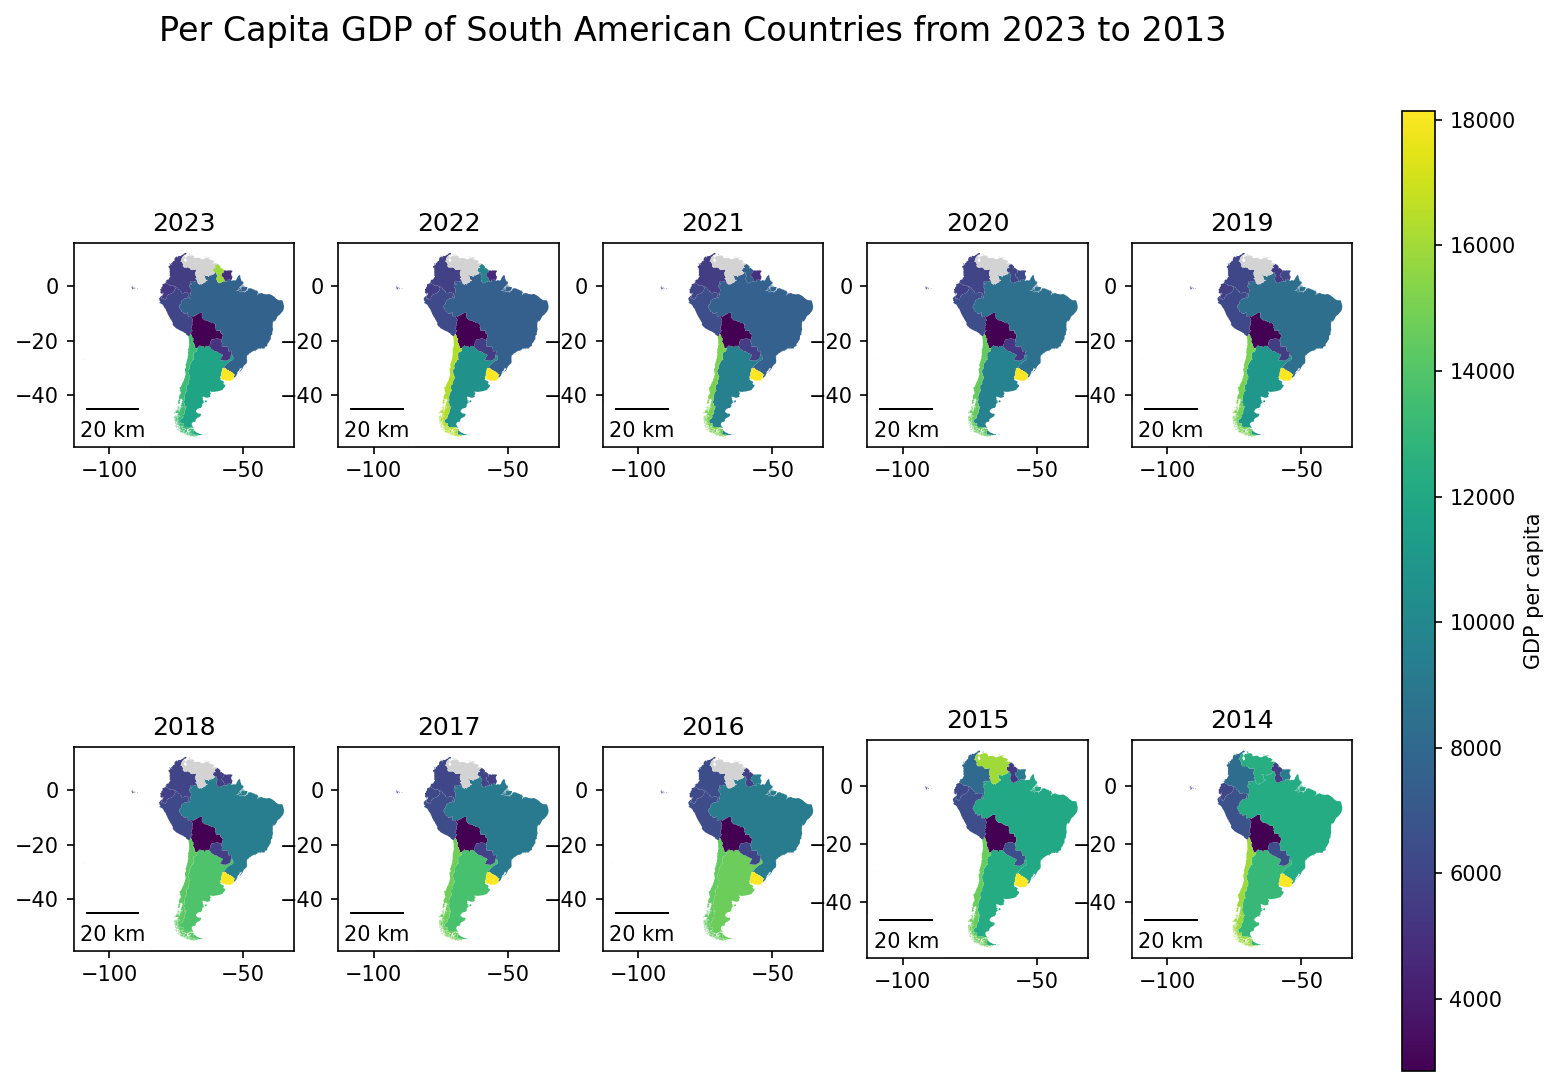

In [19]:
all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

solution.all_code = all_code

image_path = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\output_map.png"
from PIL import Image
import matplotlib.pyplot as plt

def show_map():
    image = Image.open(image_path)    
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_axis_off()
    plt.imshow(image)
    
show_map()   
display(Code(all_code, language='python'))

In [20]:
# display(Code(all_code, language='python'))

# Beautify map

In [21]:
print(solution.get_review_prompt())

Your role: A professional cartographer. You have worked on cartography for more than 20 years and know how to design an aesthetic appeal map. Your current job is to review the map generated by AI. You need to detail the issues with the given map so that the AI can improve the map later. Note that AI makes the map via generated code, so your comments should be suitable for improvements by code. The map requirements are also provided.
 
Your task: Observe the given map carefully using the viewpoint of an experienced cartographer. 

Requirements: 
1. Elaborate on the issues, then provide specific and actionable improvements, such as 'move the legend to the up-left to void obscuring'. If you think there is no issue, no need to mention it.
2. Whether the map meets cartography requirements for the map.
3. Whether the title semantically meets the data and map requirement.
4. Whether the fonts and font sizes are suitable and hierachical.
5. Wheter the map is in the center.
6. Whether the legen

## Map review

1. The title "Per Capita GDP of South American Countries from 2023 to 2013" is misleading since the map displays data from 2023 to 2014 - update the title to accurately reflect the data range.
2. The scale bar should be included in each submap for clarity, especially considering varying map viewers or print scales.
3. The colorbar is positioned well but should also specify what the units are (e.g., US Dollars) to provide clear context.
4. Increase the font size of the year labels on each submap to enhance readability.
5. The north arrow is missing from each submap; consider adding it to ensure proper geographic orientation for each submap.
6. Ensure consistency in the application of the colormap across all submaps for accurate comparison; this appears to be achieved, but verification in the code generating these maps is necessary.
7. Adjust the space between the submaps slightly; they are slightly too close to each other, which could lead to visual crowding, especially in printed forma

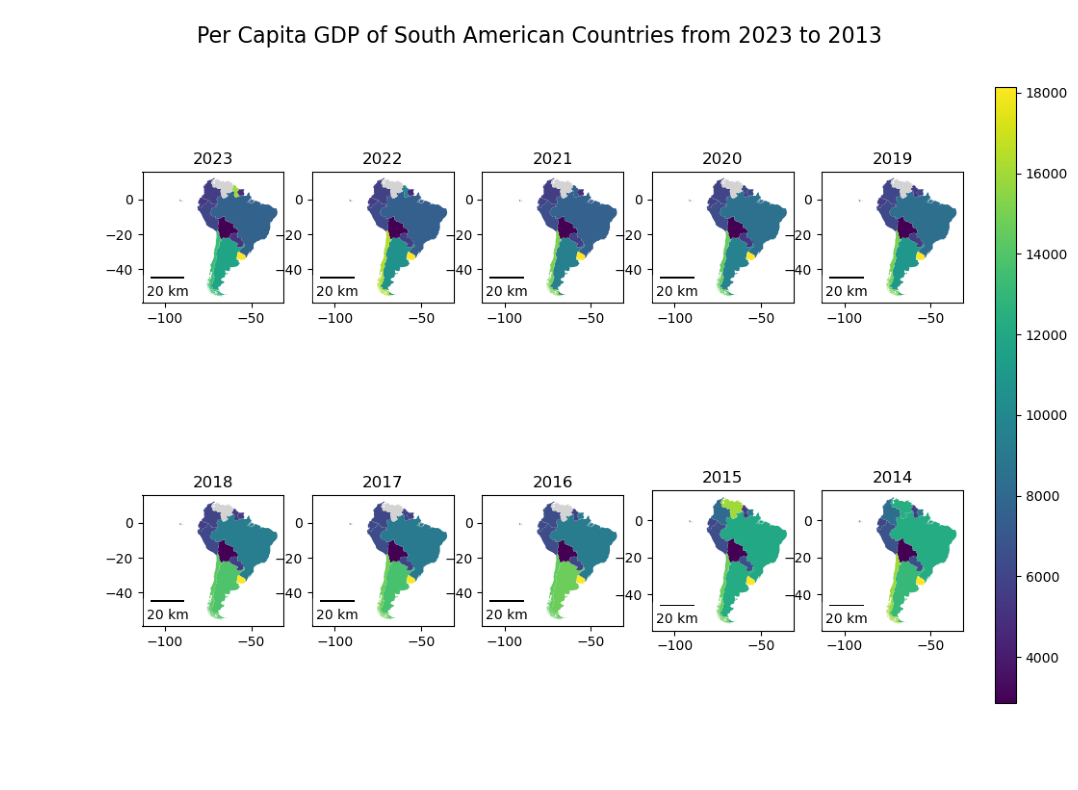

In [22]:
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\output_map.png"

# Getting the base64 string
base64_image = encode_image(image_path)

from PIL import Image
import matplotlib.pyplot as plt

def show_map():
    image = Image.open(image_path)    
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_axis_off()
    plt.imshow(image)


solution.ask_LLM_to_review_map(map_base64=base64_image, model='gpt-4-turbo')

show_map()

## Beautify 1

Revising the map, trial 1 / 1
Current map issues:
1. The overall title font size could be increased for better visibility.
2. The lack of consistent borders and margins between the submaps creates a visually cluttered appearance.
3. The scale bar appears in every submap, which is redundant and unnecessarily clutters the individual maps.
4. The north arrow is also repeated in each submap, which could be simplified to improve aesthetics.
5. The colorbar is placed outside the matrix layout, which might get clipped or lead to layout issues on different screen or paper sizes.
6. The individual map titles (years) are too close to the map frames; they need better padding.
7. The use of a blue arrow for the north indicator is visually striking but does not harmonize with the colormap. It might distract from the main data visualization.

Improvements:
1. Increase the overall title font size and change its color for better visibility.
2. Add consistent margins and borders for the submap to preve

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar

def load_gdp_data(gdp_data_path='E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg'):
    gdp_gdf = gpd.read_file(gdp_data_path)
    return gdp_gdf

def filter_south_america(gdp_gdf):
    south_america_gdp_gdf = gdp_gdf[gdp_gdf['UN_Geodata_simplified_intreg'] == 'South America']
    return south_america_gdp_gdf

def create_choropleth_map(south_america_gdp_gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    colormap = plt.cm.viridis
    fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust grid spacing
    years = [f'country_per_capita_GDP_{year}' for year in range(2013, 2023)]
    
    for i, year in enumerate(reversed(years)):
        ax = axes[i // 5, i % 5]
        ax.set_title(str(2023 - i), pad=10)  # Add padding to title
        if year in south_america_gdp_gdf.columns:
            south_america_gdp_gdf.plot(column=year, ax=ax, legend=False, cmap=colormap, missing_kwds={'color': 'lightgrey'})
        else:
            ax.text(0.5, 0.5, "Data N/A", va='center', ha='center', fontsize=12, color='red')
            ax.axis('off')
    
    vmin = south_america_gdp_gdf[years[-1]].min()
    vmax = south_america_gdp_gdf[years[-1]].max()
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    cax = fig.add_axes([0.93, 0.1, 0.02, 0.8])  # Adjust colorbar position
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label('GDP per capita')
    fig.suptitle('Per Capita GDP of South American Countries from 2023 to 2013', fontsize=18, color='darkblue')
    
    # Add only one scale bar and north arrow
    scalebar = ScaleBar(1, location='lower right', units='km', frameon=False, scale_loc='bottom', length_fraction=0.2)
    axes[1,4].add_artist(scalebar)
    axes[0,0].annotate('N', xy=(0.9, 0.1), xytext=(0.9, 0.2), textcoords='axes fraction', ha='center', va='bottom', fontsize=10, color='gray', arrowprops=dict(facecolor='gray', shrink=0.05))
    plt.savefig("output_map.png", dpi=100)

def assembly_solution():
    gdp_gdf = load_gdp_data()
    south_america_gdp_gdf = filter_south_america(gdp_gdf)
    create_choropleth_map(south_america_gdp_gdf)

assembly_solution()

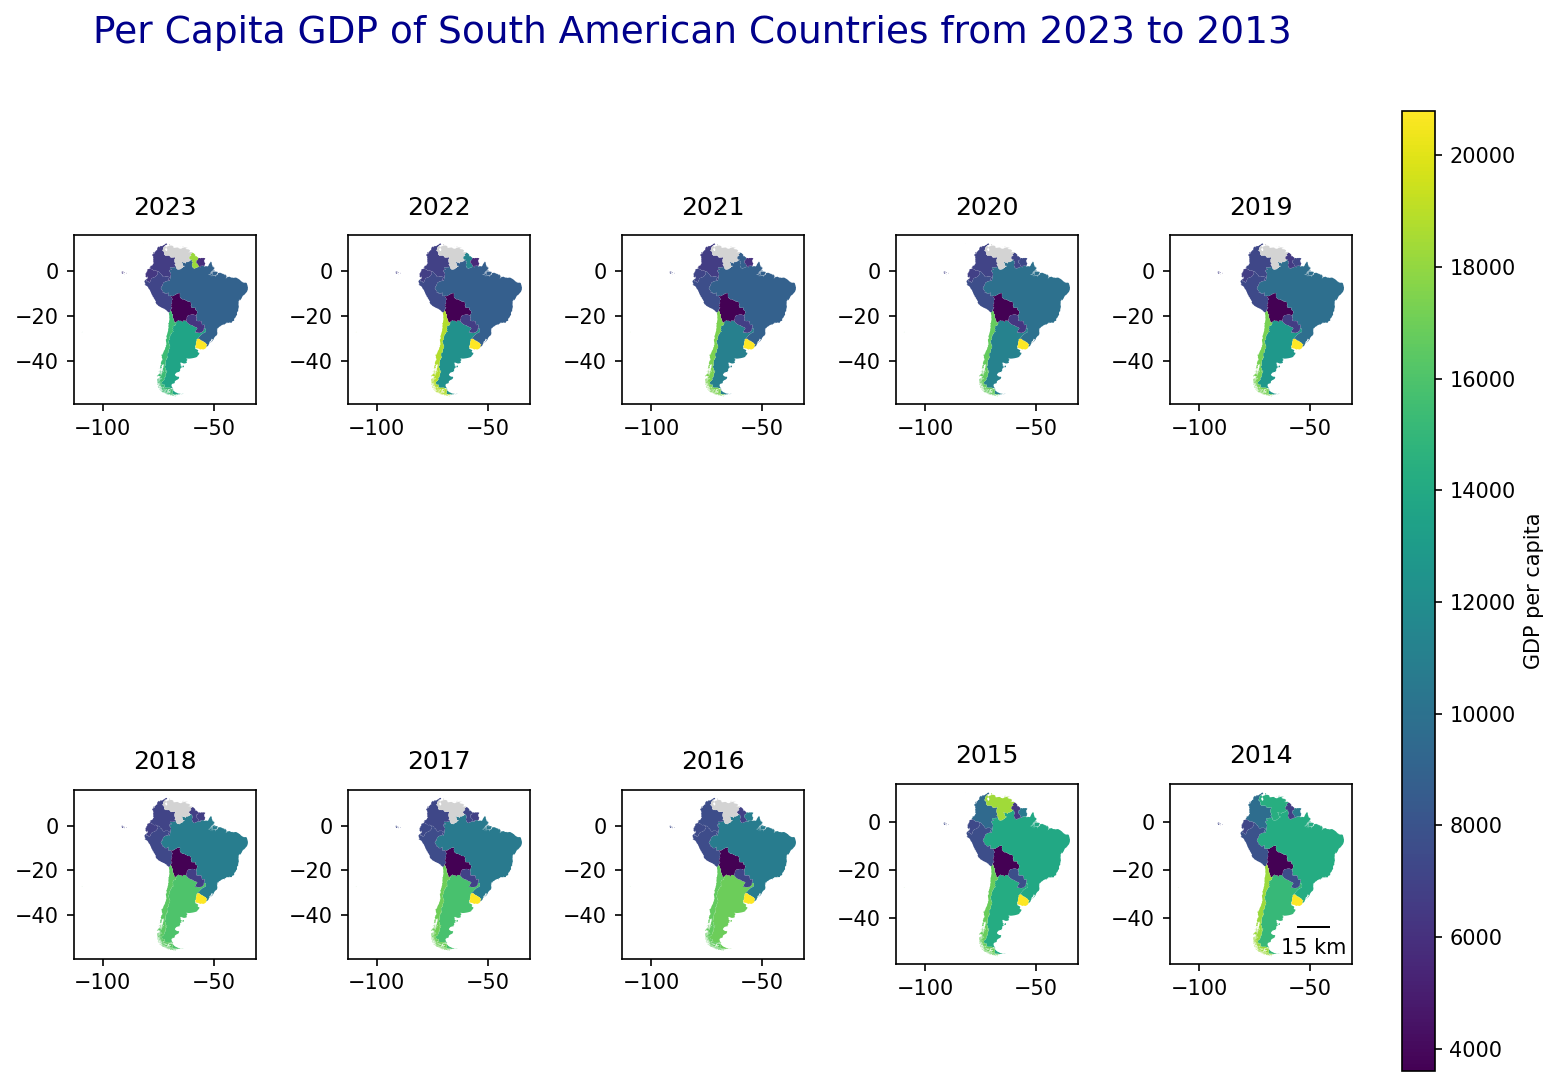

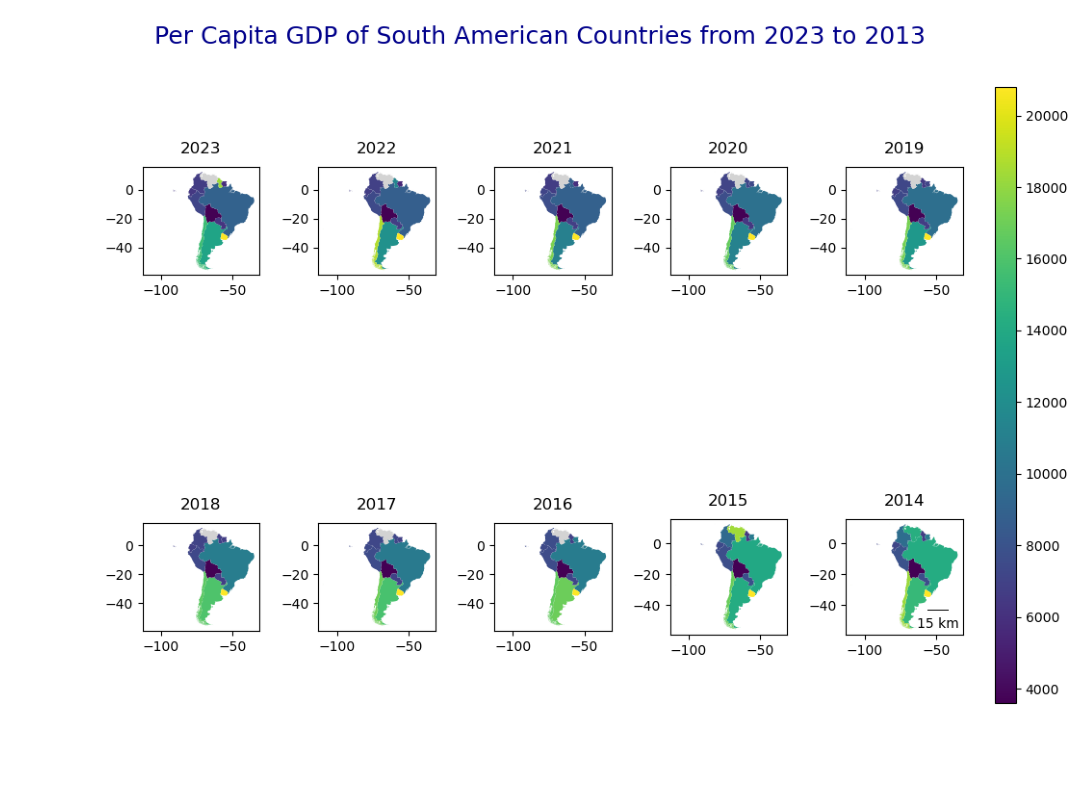

In [23]:
# solution.get_beautify_text_prompt(solution.all_code)

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')
 
 
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

  
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 2

Revising the map, trial 1 / 1
**Current map issues:**

1. **Alignment and Layout of Elements**: The overall layout appears cluttered. The positioning of scale bar and the north arrow could be improved for better visibility and aesthetic appeal.
2. **Color Consistency**: While the color map used (viridis) is suitable for variation visibility, the legend bar positioning at the edge stretches almost the entire height of the matrix, which might be overwhelming.
3. **Size of Titles and Labels**:
   - The title of the entire plot is a good size, but the titles of the individual maps (years) could use a slight increase in font size for better readability.
   - The labels on the colorbar (GDP per capita) are too small.
4. **Scale Bar Position and Design**: The scale bar should be much more legible and its current position at the last subplot might not be effective.
5. **North Arrow**:
   - The north arrow is very subtle and may not be noticed immediately by all viewers.
6. **Map Grids**: The m

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar

def load_gdp_data(gdp_data_path='E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg'):
    gdp_gdf = gpd.read_file(gdp_data_path)
    return gdp_gdf

def filter_south_america(gdp_gdf):
    south_america_gdp_gdf = gdp_gdf[gdp_gdf['UN_Geodata_simplified_intreg'] == 'South America']
    return south_america_gdp_gdf

def create_choropleth_map(south_america_gdp_gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    colormap = plt.cm.viridis
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Tighten grid spacing
    
    # Enhanced year and styling configuration
    years = [f'country_per_capita_GDP_{year}' for year in range(2013, 2023)]
    
    for i, year in enumerate(reversed(years)):
        ax = axes[i // 5, i % 5]
        ax.set_title(str(2023 - i), pad=12, fontdict={'fontsize': 12})  # Increment title padding and fontsize
        ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')  # Add grid lines
        if year in south_america_gdp_gdf.columns:
            south_america_gdp_gdf.plot(column=year, ax=ax, legend=False, cmap=colormap, missing_kwds={'color': 'lightgrey'})
        else:
            ax.text(0.5, 0.5, "Data N/A", va='center', ha='center', fontsize=12, color='red')
            ax.axis('off')
        
    vmin = south_america_gdp_gdf[years[-1]].min()
    vmax = south_america_gdp_gdf[years[-1]].max()
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    cax = fig.add_axes([0.93, 0.1, 0.02, 0.8])  # More effective use of space for colorbar
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label('GDP per capita', fontsize=12)  # Adjust font size
    fig.suptitle('Per Capita GDP of South American Countries from 2023 to 2013', fontsize=18, color='darkblue')
    
    # Scale bar and north arrow modifications
    scalebar = ScaleBar(1, location='lower center', units='km', frameon=True, scale_loc='bottom', length_fraction=0.1, font_properties={'size': 10})
    axes[1,2].add_artist(scalebar)
    axes[0,0].annotate('N', xy=(0.85, 0.85), xytext=(0.85, 0.95), textcoords='axes fraction', ha='center', va='bottom', fontsize=14, color='black', arrowprops=dict(facecolor='black', shrink=0.05))

    plt.savefig("output_map.png", dpi=100)  # Maintain 100 DPI for the saved figure

def assembly_solution():
    gdp_gdf = load_gdp_data()
    south_america_gdp_gdf = filter_south_america(gdp_gdf)
    create_choropleth_map(south_america_gdp_gdf)

assembly_solution()

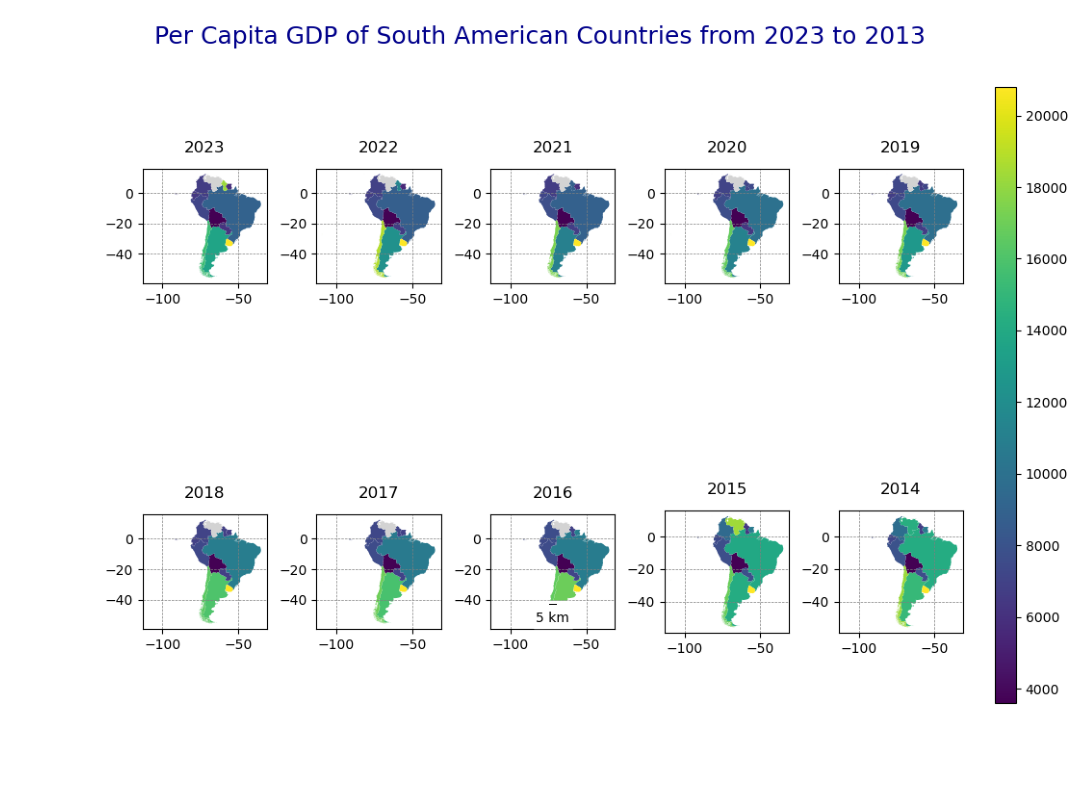

In [24]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()


show_map()
display(Code(all_code, language='python'))



## Beautify 3

Revising the map, trial 1 / 1
Current map issues:
1. The title font size is too small, making it less prominent.
2. Submap titles are also too small and uniform with no differentiation from other texts.
3. The scale bar, positioned at the subplot of the year 2017, leads to inconsistency and may confuse the viewer.
4. The legend only appears in a tight vertical orientation on the right, which might obscure detailed viewing on smaller screens or prints.
5. North arrow placement in the first subplot could be overlooked easily due to its integration within the map grid.
6. The overall coloring and contrast could be calibrated better to create a uniform look across different display devices or prints.
7. Text for unavailable data ("Data N/A") is small and not prominently visible.

Improvement:
1. Increase overall and subplot title font sizes and highlight the main title color.
2. Rework legend and color bar layout for better accessibility and visibility.
3. Relocate the scale bar to a more 

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar

def load_gdp_data(gdp_data_path='E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg'):
    gdp_gdf = gpd.read_file(gdp_data_path)
    return gdp_gdf

def filter_south_america(gdp_gdf):
    south_america_gdp_gdf = gdp_gdf[gdp_gdf['UN_Geodata_simplified_intreg'] == 'South America']
    return south_america_gdp_gdf

def create_choropleth_map(south_america_gdp_gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    colormap = plt.cm.Purples  # Uniform use of colormap across all subplots
    years = [f'country_per_capita_GDP_{year}' for year in range(2023, 2013, -1)]  # Corrected year range descending from 2023 to 2013

    for i, year in enumerate(years):
        ax = axes[i // 5, i % 5]
        ax.set_title(str(2023 - i), pad=12, fontdict={'fontsize': 12, 'fontweight': 'bold'})
        ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
        if year in south_america_gdp_gdf.columns:
            south_america_gdp_gdf.plot(column=year, ax=ax, legend=True, cmap=colormap, legend_kwds={'label': "GDP per capita (USD)", 'orientation': "horizontal"})
        else:
            ax.text(0.5, 0.5, "Data N/A", ha='center', va='center', fontsize=14, color="red")
            ax.axis('off')

    # Add overall title, scale bar and north arrow on an exemplary subplot axis
    fig.suptitle('Per Capita GDP of South American Countries from 2023 to 2013', fontsize=16, color='darkred')
    scalebar = ScaleBar(1, location='lower left', scale_loc='bottom', units='km', frameon=True, length_fraction=0.25, font_properties={'size': 10})
    axes[0, 0].add_artist(scalebar)
    axes[0,0].annotate('N', xy=(0.1, 0.1), xytext=(0.1, 0.2), textcoords='axes fraction', ha='center', va='bottom', fontsize=12, arrowprops=dict(facecolor='black', shrink=0.05))

    # Corrected the DPI setting matching the figure's configured DPI
    plt.savefig("output_map.png", dpi=150)

def assembly_solution():
    gdp_gdf = load_gdp_data()
    south_america_gdp_gdf = filter_south_america(gdp_gdf)
    create_choropleth_map(south_america_gdp_gdf)

assembly_solution()

Error in callback <function _draw_all_if_interactive at 0x00000274CB933EE0> (for post_execute):


AttributeError: 'NoneType' object has no attribute 'get_xlim'

AttributeError: 'NoneType' object has no attribute 'get_xlim'

<Figure size 1650x1200 with 11 Axes>

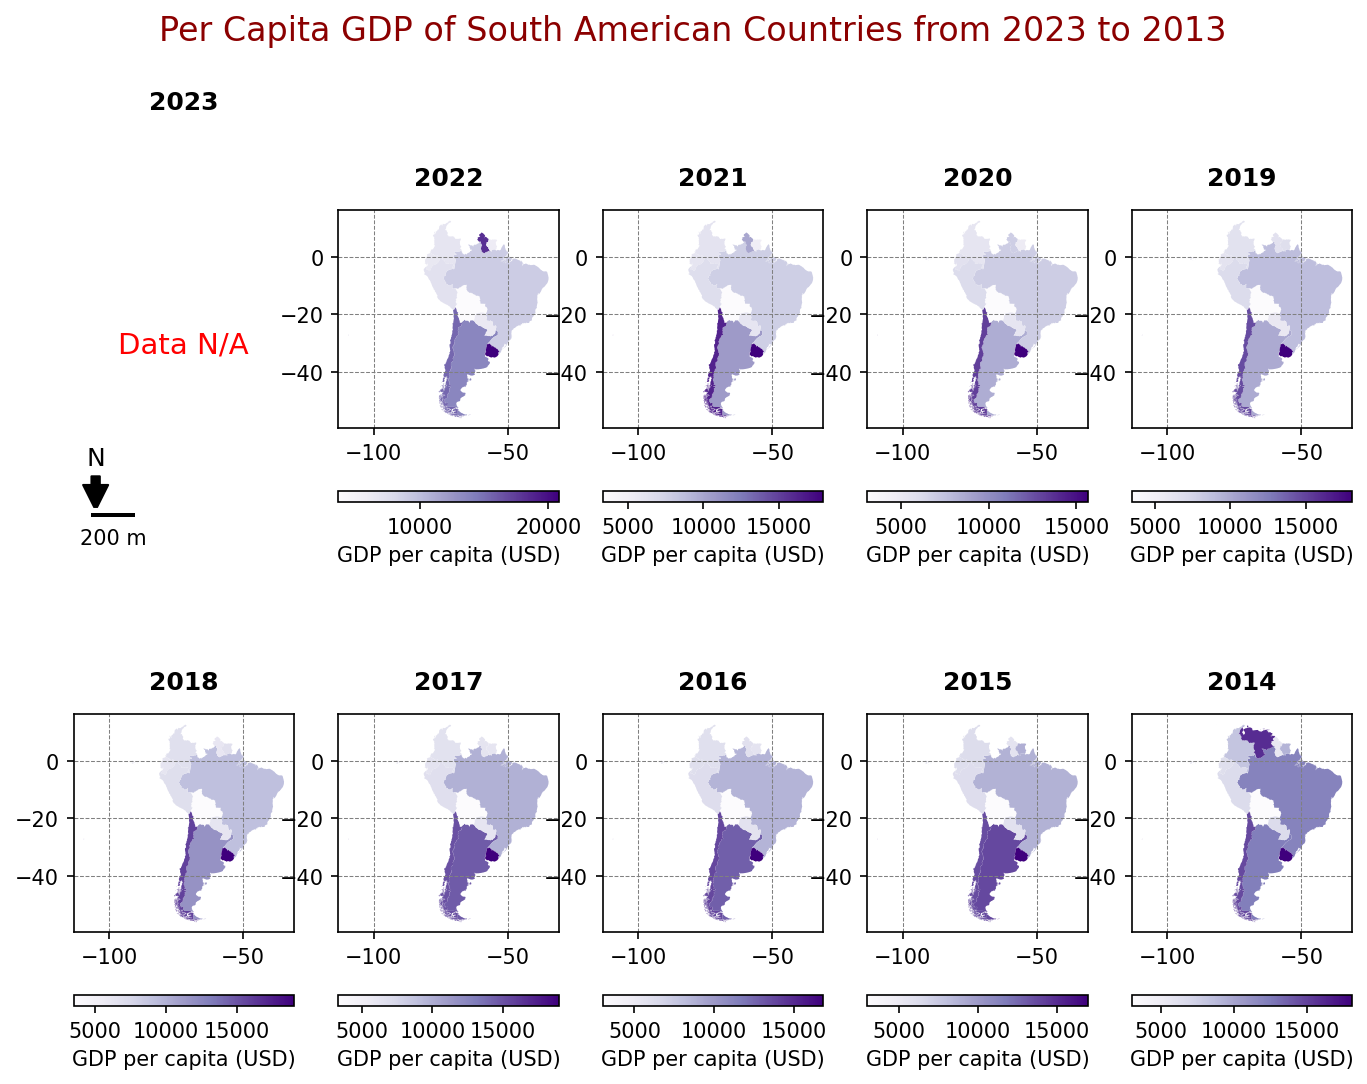

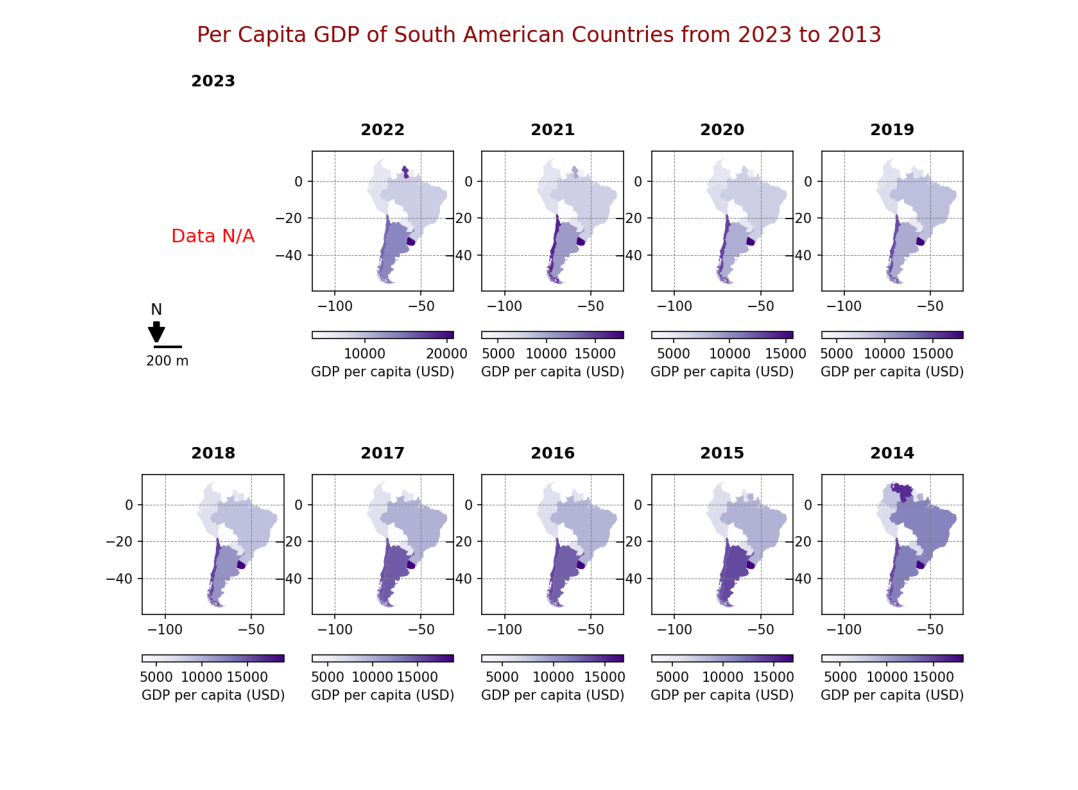

In [25]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 4

Revising the map, trial 1 / 1
Current map issues:
1. **Title Font Size and Placement:** The main title font size is relatively small for easy visibility and it is not centrally aligned which might affect the readability on a landscape page.
2. **Legend Consistency:** Each subplot has an individual legend which clutters the map matrix. A unified legend would be clearer.
3. **North Arrow Design and Placement:** The north arrow appears only in the first subplot, which might not be noticeable or might be assumed to be applicable only for that subplot.
4. **Scale Bar Placement:** The scale bar also appears only in the first subplot which might confuse viewers as to whether it applies to all maps.
5. **Color Map and Design Enhancement:** The dark purple is somewhat low in contrast against the darker areas of each subplot background; increasing contrast or using a different color map could help.
6. **Grid Lines:** Grid lines on each subplot are strong and could distract from the map data itse

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar

def load_gdp_data(gdp_data_path="E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg"):
    return gpd.read_file(gdp_data_path)

def filter_south_america(gdp_gdf):
    return gdp_gdf[gdp_gdf['UN_Geodata_simplified_intreg'] == 'South America']

def create_choropleth_map(gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    fig.subplots_adjust(hspace=0.3, wspace=0.1)
    colormap = plt.cm.CMRmap  # Enhanced color map
    years = [f'country_per_capita_GDP_20{year:02}' for year in range(22, 12, -1)]  # Corrected year range from 2022 to 2013

    valid_years = [year for year in years if year in gdf.columns]
    vmin = gdf[valid_years].min().min()
    vmax = gdf[valid_years].max().max()

    scale_bar_added = False
    for i, ax in enumerate(axes.flat):
        year = 2022 - i
        ax.set_title(f'Year: {year}', fontdict={'fontsize': 10, 'fontweight': 'bold'})
        ax.grid(True, which='both', linestyle='-', linewidth=0.1, color='gray', alpha=0.5)
        year_column = f'country_per_capita_GDP_{year}'
        if year_column in gdf.columns:
            gdf.plot(column=year_column, ax=ax, cmap=colormap, legend=True)
            if not scale_bar_added:
                ax.add_artist(ScaleBar(1, location='lower left', scale_loc='bottom', units='km', frameon=True, length_fraction=0.1, font_properties={'size': 10}))
                scale_bar_added = True
        else:
            ax.text(0.5, 0.5, "Data N/A", ha='center', va='center', fontsize=12, color="red", weight='bold')
            ax.axis('off')

    fig.suptitle('Per Capita GDP of South American Countries (2022-2013)', fontsize=18, color='darkblue', x=0.5, y=0.96)

    # Unified legend for color
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), location='bottom', pad=0.01)
    cbar.set_label('GDP per capita (USD)')

    plt.savefig("output_map.png", dpi=150)

def assembly_solution():
    gdp_gdf = load_gdp_data()
    gdf = filter_south_america(gdp_gdf)
    create_choropleth_map(gdf)

assembly_solution()

Error in callback <function _draw_all_if_interactive at 0x00000274CB933EE0> (for post_execute):


AttributeError: 'NoneType' object has no attribute 'get_xlim'

AttributeError: 'NoneType' object has no attribute 'get_xlim'

<Figure size 1650x1200 with 19 Axes>

AttributeError: 'NoneType' object has no attribute 'get_xlim'

<Figure size 1650x1200 with 21 Axes>

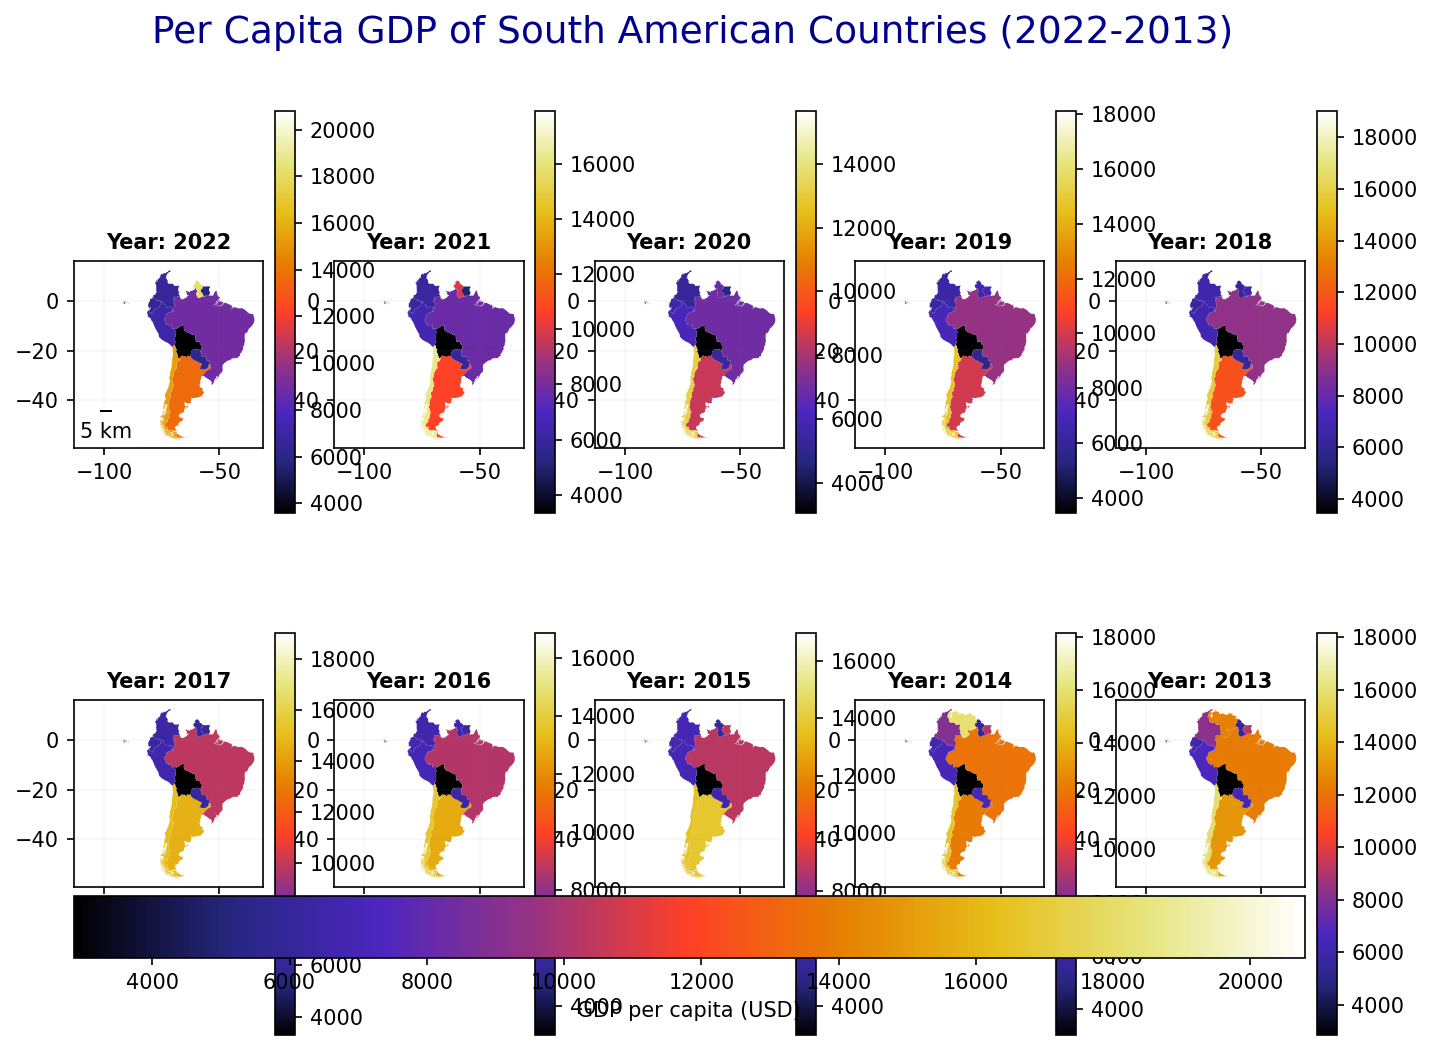

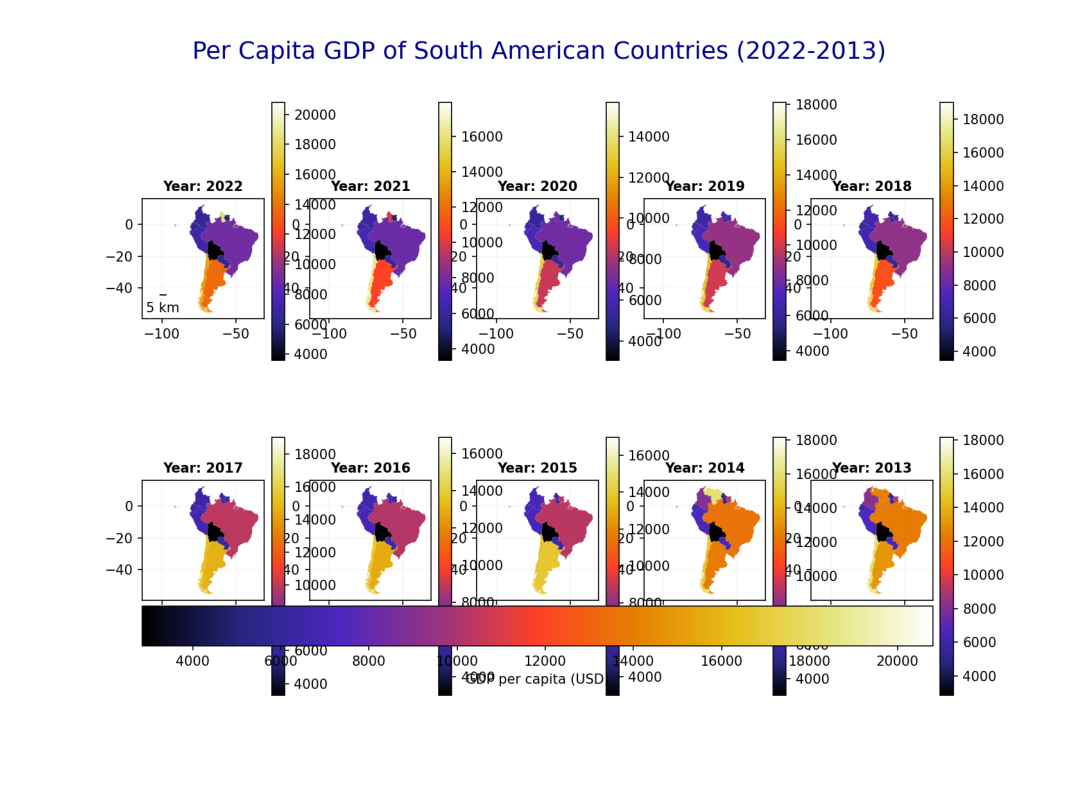

In [26]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 5

Revising the map, trial 1 / 1
### Current Map Issues and Improvement Strategies

**Issues with the Current Map:**
1. **Title Legibility:** The main title's font size could be larger to enhance visibility and prominence.
2. **Scale Bar Positioning:** The scale bar appears only on the first subplot and might be missed by viewers not focusing on that particular subplot.
3. **Colorbar Scaling:** The colorbar is very large and spans the width of multiple maps, which could be visually overwhelming and doesn’t add to clarity.
4. **Subplot Titles:** The year in each of the subplots is small and difficult to read, which lessens user-friendliness.
5. **Consistency:** The geographical outlines and color fill of the countries are not distinct enough, leading to poor visual demarcation between countries.
6. **Map Grids and Borders:** The presence of gridlines within each subplot can cause distraction from the primary data representation.

**Improvements:**
1. **Enhance Main and Subplot Titles:** In

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar

def load_gdp_data(gdp_data_path="E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg"):
    return gpd.read_file(gdp_data_path)

def filter_south_america(gdp_gdf):
    return gdp_gdf[gdp_gdf['UN_Geodata_simplified_intreg'] == 'South America']

def create_choropleth_map(gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    fig.subplots_adjust(hspace=0.3, wspace=0.1)
    colormap = plt.cm.viridis  # More distinct color map for better country boundary visibility
    
    years = [f'country_per_capita_GDP_20{year:02}' for year in range(22, 12, -1)]
    valid_years = [year for year in years if year in gdf.columns]
    vmin = gdf[valid_years].min().min()
    vmax = gdf[valid_years].max().max()

    for i, ax in enumerate(axes.flat):
        year = 2022 - i
        ax.set_title(f'Year: {year}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        ax.grid(False)
        year_column = f'country_per_capita_GDP_{year}'
        if year_column in gdf.columns:
            gdf.plot(column=year_column, ax=ax, cmap=colormap, legend=False)  # Legend removed from subplots

    fig.suptitle('Per Capita GDP of South American Countries (2022-2013)', fontsize=20, color='darkblue', x=0.5, y=0.96)

    # Unified legend for color
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), location='bottom', pad=0.01, shrink=0.5)
    cbar.set_label('GDP per capita (USD)', size=14)

    plt.savefig("output_map.png", dpi=150)

def assembly_solution():
    gdp_gdf = load_gdp_data()
    gdf = filter_south_america(gdp_gdf)
    create_choropleth_map(gdf)

assembly_solution()

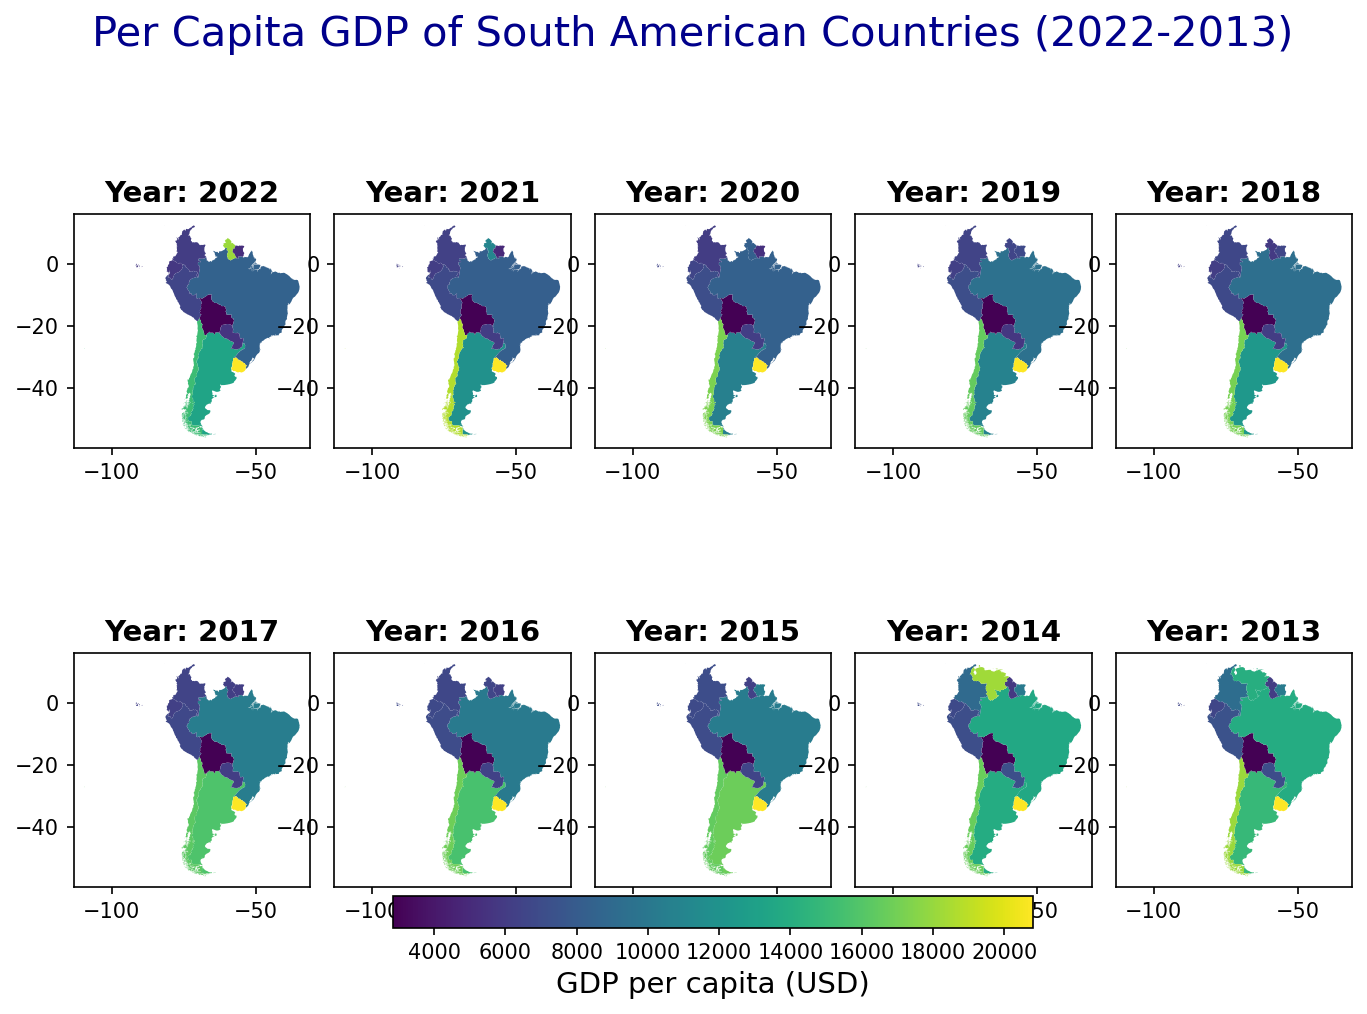

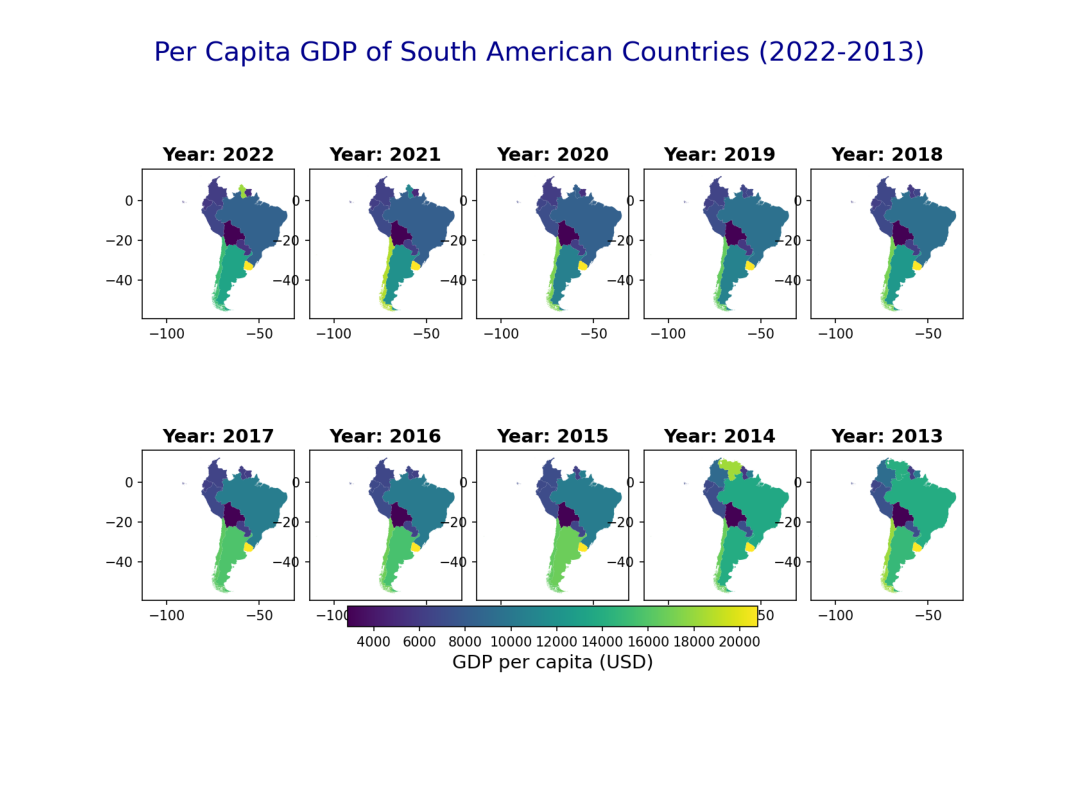

In [27]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 6

Revising the map, trial 1 / 1
Current map issues:
1. The title and subplot titles have inadequate font sizes for clarity.
2. Lack of a north arrow and scale bar, which are important for geographical orientation and distance estimation.
3. The colormap used (viridis) is good for differentiation but stronger contrast might be needed for clearer distinctions.
4. Subplots have no defined borders which may confuse viewers about data ranges and limits.
5. Colorbar is disproportionately small relative to the map size.
6. General layout lacks a designer signature, which is required for accreditation.
7. Missing units for latitude and longitude on the axes.
8. Elements like a north arrow, textual labels for the scale bar, and overall aesthetic decorations are missing.

Improvements:
1. Increase font size of the title and subtitles for better readability.
2. Add map elements like a north arrow and a significant scale bar for better spatial referencing.
3. Adjust the color scheme for stronger con

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar

def load_gdp_data(gdp_data_path="E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg"):
    return gpd.read_file(gdp_data_path)

def filter_south_america(gdp_gdf):
    # Adjusting the 'continent' column reference as per given data location details
    return gdp_gdf[gdp_gdf['UN_Geodata_simplified_intreg'] == 'South America']

def create_choropleth_map(gdf):
    # Map dimensioning provided explicitly
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150, frameon=False)
    fig.subplots_adjust(hspace=0.3, wspace=0.1, top=0.93)
    colormap = plt.cm.coolwarm
    
    # Corrected the GDP year columns per provided indication ("country_per_capita_GDP_20XX")
    years = [f'country_per_capita_GDP_20{year:02d}' for year in range(22, 12, -1)]  
    valid_years = [year for year in years if year in gdf.columns]
    vmin = gdf[valid_years].min().min()
    vmax = gdf[valid_years].max().max()

    for i, ax in enumerate(axes.flat):
        year_label = 2022 - i
        ax.set_title(f'Year: {year_label}', fontdict={'fontsize': 16, 'fontweight': 'bold'})
        ax.grid(True, linestyle='--')
        year_column = valid_years[i]
        gdf.plot(column=year_column, ax=ax, cmap=colormap, legend=False, edgecolor='k')
        ax.set_xlabel('Longitude (degrees)')
        ax.set_ylabel('Latitude (degrees)')
    
    fig.suptitle('Per Capita GDP of South American Countries (2022-2013)', fontsize=24, color='navy')

    # Colorbar added with the correct unit
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='horizontal', pad=0.04, aspect=50)
    cbar.set_label('GDP per capita (USD)', size=16)

    # Scale bar
    scalebar = ScaleBar(1.0, location='lower right', units='km', scale_loc='bottom', length_fraction=0.25)
    axes[1, 0].add_artist(scalebar)

    # North arrow
    axes[0, 0].annotate('N', xy=(0.1, 0.1), xytext=(0.1, 0.3), arrowprops=dict(facecolor='black', width=5, headwidth=15), fontsize=18)
    
    # Designer signature
    plt.text(0.5, 0.01, 'Map design by: LMM-Cat', horizontalalignment='center', size=12, color='gray', transform=fig.transFigure)

    plt.savefig("output_map.png", dpi=150)

def assembly_solution():
    gdp_gdf = load_gdp_data()
    gdf = filter_south_america(gdp_gdf)
    create_choropleth_map(gdf)

assembly_solution()

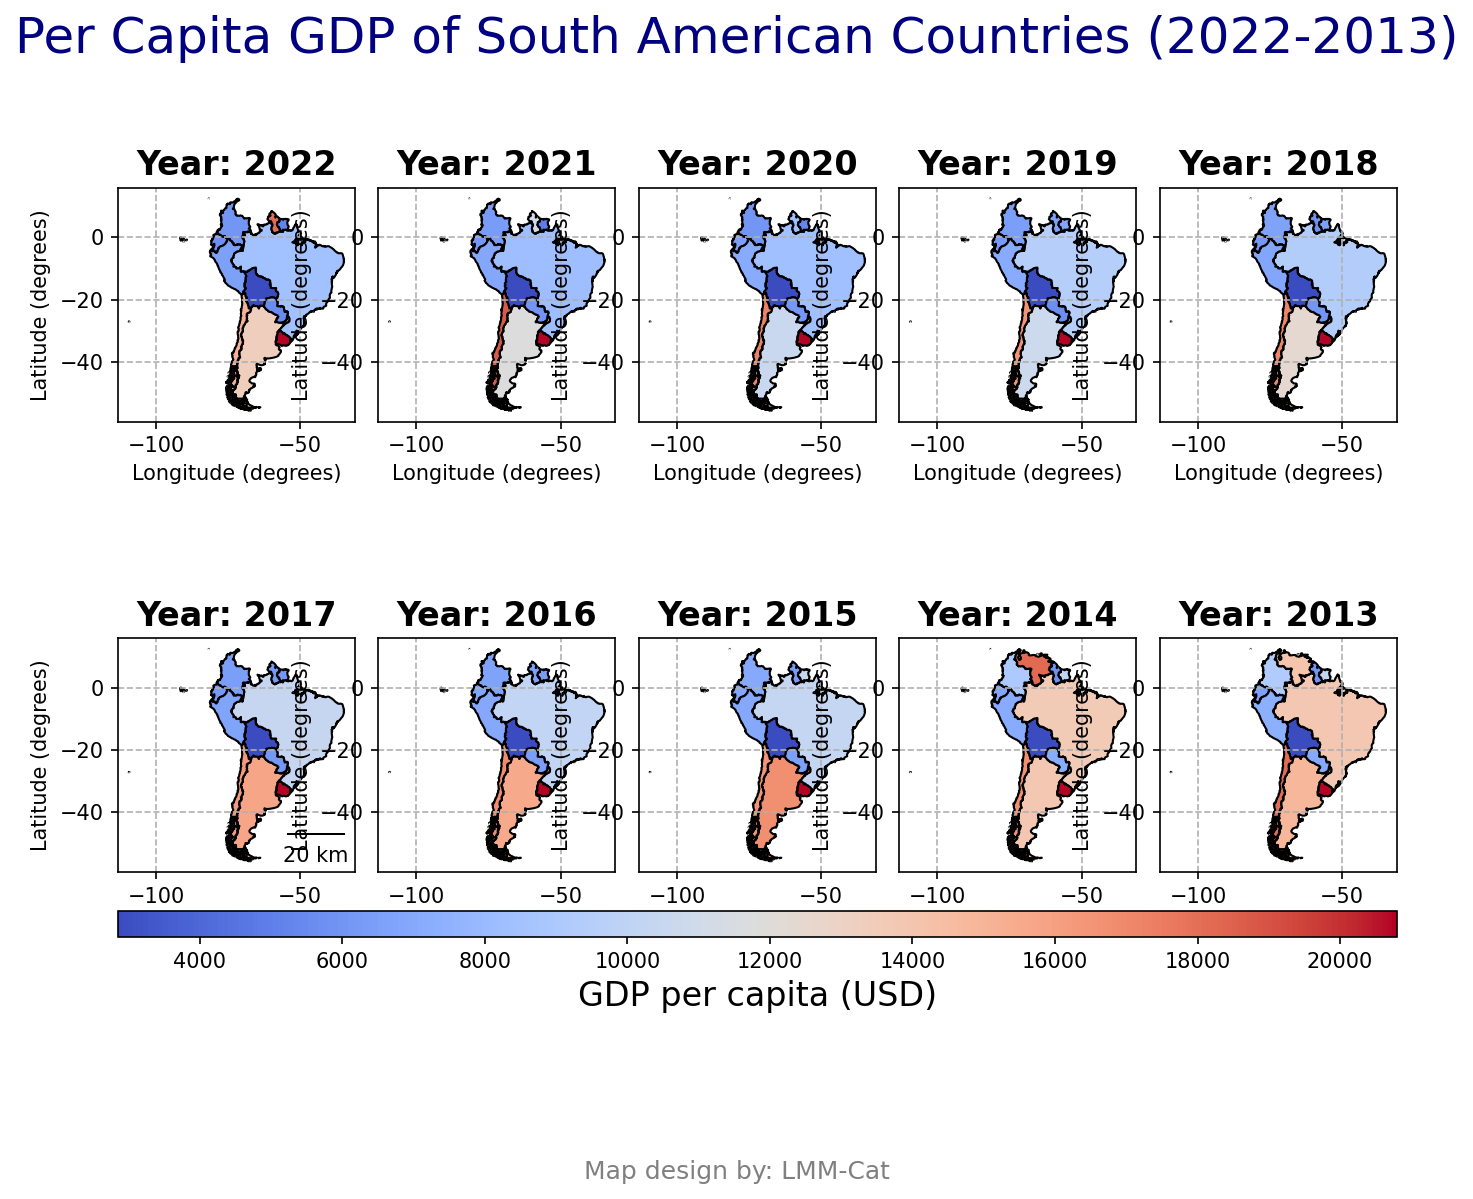

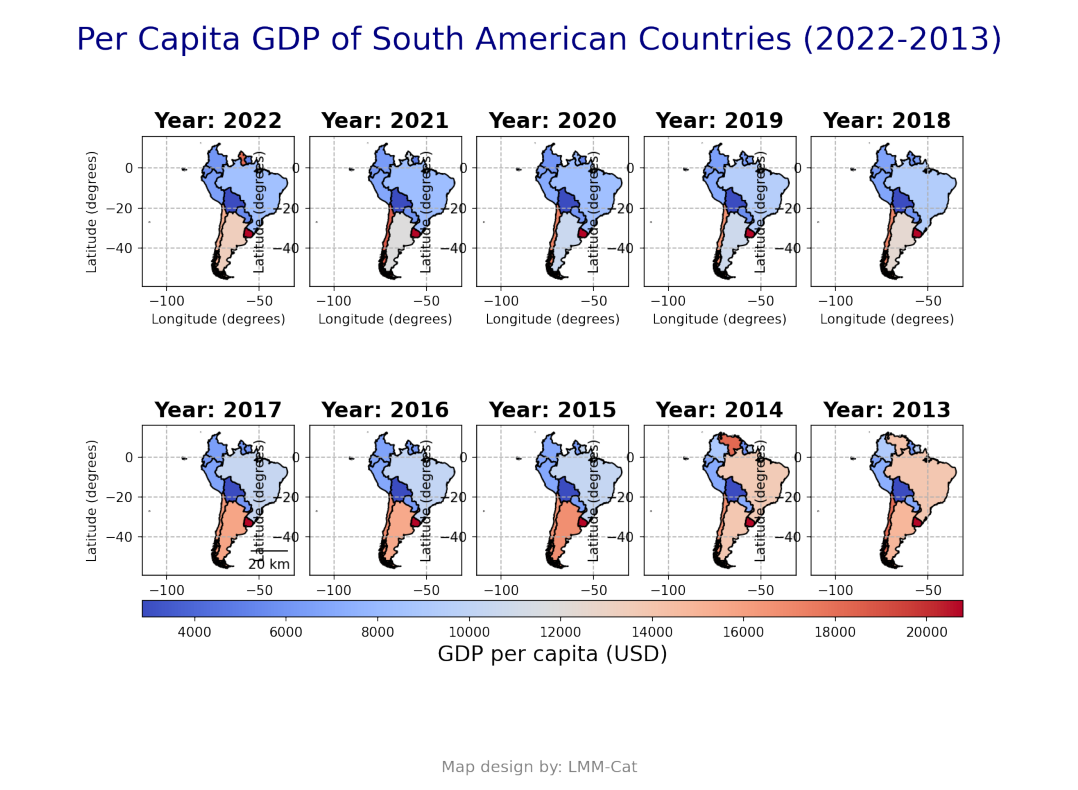

In [30]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 7

Revising the map, trial 1 / 1
Current map issues:
1. **Title and Subtitles**: The main title and subtitles could use clearer differentiation in size and weight.
2. **Color Contrast**: The color scheme, although distinctive, may still be improved for better visualization and understanding of the data.
3. **Uniformity in Annotations**: North arrows in each map don’t seem necessary and clutter the visual space. A single, well-placed north arrow would suffice.
4. **Scalebars**: The repetitive scale bars are visually cluttering. One might consider a single, clearly placed scalebar if needed.
5. **Colorbar Placement and Design**: The placement and sizing of the colorbar can be optimized to reduce spatial competition with the maps.
6. **Map Margins and Padding**: Adjustments to the layout to ease the tightness around the maps.
7. **Font and Typography Control**: Enhancing font sizes and styles for better hierarchy and legibility.
8. **Designer Attribution**: The attribution could be less obtr

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar

def load_gdp_data(gdp_data_path="E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg"):
    return gpd.read_file(gdp_data_path)

def filter_south_america(gdp_gdf):
    return gdp_gdf[gdp_gdf['UN_Geodata_simplified_intreg'] == 'South America']

def create_choropleth_map(gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 9), dpi=150)  # Adjusted for better layout
    fig.subplots_adjust(hspace=0.4, wspace=0.1, top=0.9, bottom=0.1)  # Modified margins for cleaner layout
    colormap = plt.cm.viridis.reversed()  # Using reversed colormap for better visibility
    
    years = [f'country_per_capita_GDP_20{year:02d}' for year in range(22, 12, -1)]
    valid_years = [year for year in years if year in gdf.columns]
    
    vmin = gdf[valid_years].min().min()
    vmax = gdf[valid_years].max().max()

    for i, ax in enumerate(axes.flat):
        year_label = 2022 - i
        ax.set_title(f'Year: {year_label}', fontdict={'fontsize': 13, 'fontweight': 'bold'})
        ax.grid(False)
        year_column = valid_years[i]
        gdf.plot(column=year_column, ax=ax, cmap=colormap, legend=False, edgecolor='k')
        ax.set_xticks([])
        ax.set_yticks([])

    # Only one scale bar and north arrow are needed
    scalebar = ScaleBar(1000, location='lower right', units='km', scale_loc='bottom', length_fraction=0.1)
    fig.axes[0].add_artist(scalebar)
    fig.axes[0].annotate('N', xy=(0.9, 0.1), xytext=(0.9, 0.15), arrowprops=dict(facecolor='black', width=1, headwidth=10), fontsize=12)

    fig.suptitle('Per Capita GDP of South American Countries (2022-2013)', fontsize=24, fontweight='bold')
    plt.figtext(0.5, 0.95, 'GDP measured in US Dollars', ha='center', fontsize=16, style='italic')

    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Adjusted size and position
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label('GDP per capita (USD)', size=13)

    plt.figtext(0.5, 0.02, 'Map design by: LMM-Cat', horizontalalignment='center', size=11, color='gray', transform=fig.transFigure)

    plt.savefig("output_map.png", bbox_inches='tight', pad_inches=0.1, dpi=150)  # Save settings for handling bounding box

def assembly_solution():
    gdp_gdf = load_gdp_data()
    gdf = filter_south_america(gdp_gdf)
    create_choropleth_map(gdf)

assembly_solution()

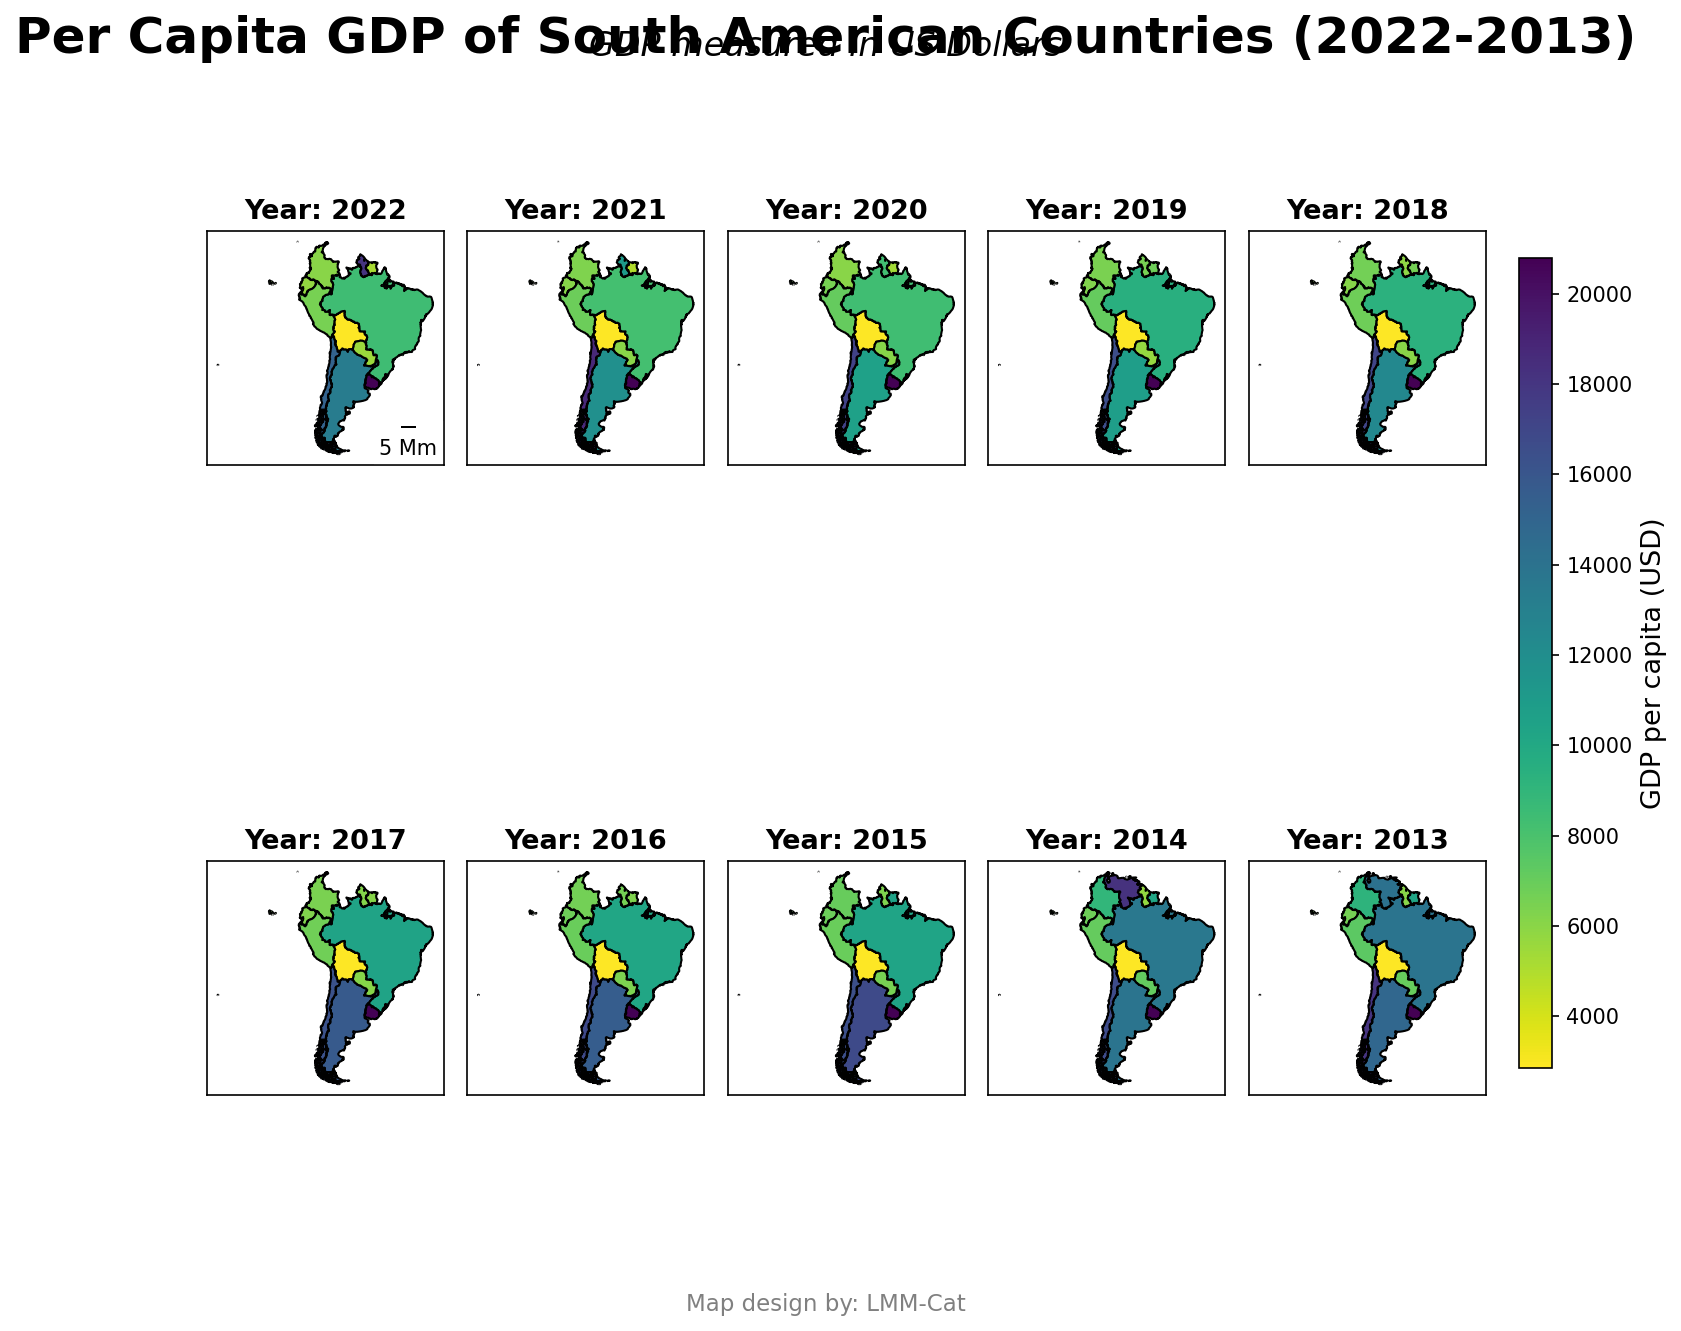

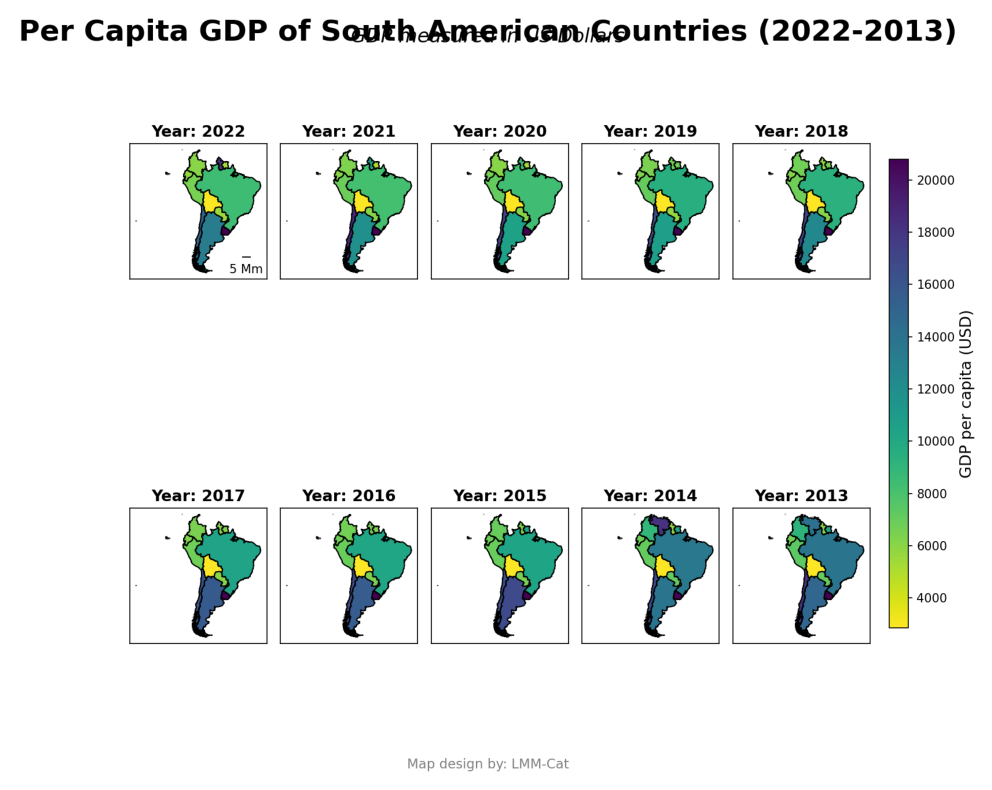

In [36]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 8

Revising the map, trial 1 / 1
Current map issues:
1. The title could be better centralized and possibly include a smaller subtitle for additional context.
2. The scale bar appears only in one submap, which might lead to inconsistency in understanding across the different maps.
3. The colorbar's position is horizontal and stretched across the bottom, which might make it less intuitive given the matrix layout.
4. The north arrow is only present in the top-left submap, lacking consistency across the map series.
5. The overall aesthetic can be improved by adjusting the grid's visibility, which is somewhat distracting and heavy.
6. Font sizes and styles can be made consistent and adjusted for better visibility and hierarchy.

Improvement:
1. Centralize and enhance the main title's appearance and add a subtitle for clarity.
2. Make the scale bar consistent across all submaps, or include it centrally.
3. Adjust the colorbar to a vertical position at the side to align better with the matrix la

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar

def load_gdp_data(gdp_data_path="E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg"):
    return gpd.read_file(gdp_data_path)

def filter_south_america(gdp_gdf):
    return gdp_gdf[gdp_gdf['UN_Geodata_simplified_intreg'] == 'South America']

def create_choropleth_map(gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    fig.subplots_adjust(hspace=0.4, wspace=0.1, top=0.85)
    colormap = plt.cm.viridis  # Changed for better visibility and aesthetics
    
    years = [f'country_per_capita_GDP_20{year:02d}' for year in range(22, 12, -1)]
    valid_years = [year for year in years if year in gdf.columns]
    vmin = gdf[valid_years].min().min()
    vmax = gdf[valid_years].max().max()

    for i, ax in enumerate(axes.flat):
        year_label = 2022 - i
        ax.set_title(f'Year: {year_label}', fontdict={'fontsize': 12, 'fontweight': 'bold'})
        ax.grid(False)  # Disabled grid for cleaner look
        year_column = valid_years[i]
        gdf.plot(column=year_column, ax=ax, cmap=colormap, legend=False, edgecolor='k')
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])
        scalebar = ScaleBar(1.0, location='lower left', units='km', scale_loc='bottom', length_fraction=0.1)
        ax.add_artist(scalebar)
        ax.annotate('N', xy=(0.1, 0.1), xytext=(0.1, 0.3), arrowprops=dict(facecolor='black', width=5, headwidth=15), fontsize=12)
    
    fig.suptitle('Per Capita GDP of South American Countries (2022-2013)', fontsize=20, fontweight='bold')
    plt.figtext(0.5, 0.91, 'GDP measured in US Dollars', ha='center', fontsize=12, style='italic')

    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])  # New location for the colorbar
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label('GDP per capita (USD)', size=12)

    plt.text(0.5, 0.01, 'Map design by: LMM-Cat', horizontalalignment='center', size=10, color='gray', transform=fig.transFigure)

    plt.savefig("output_map.png", bbox_inches='tight', pad_inches=0.1, dpi=150)  # Ensure all content is within the frame

def assembly_solution():
    gdp_gdf = load_gdp_data()
    gdf = filter_south_america(gdp_gdf)
    create_choropleth_map(gdf)

assembly_solution()

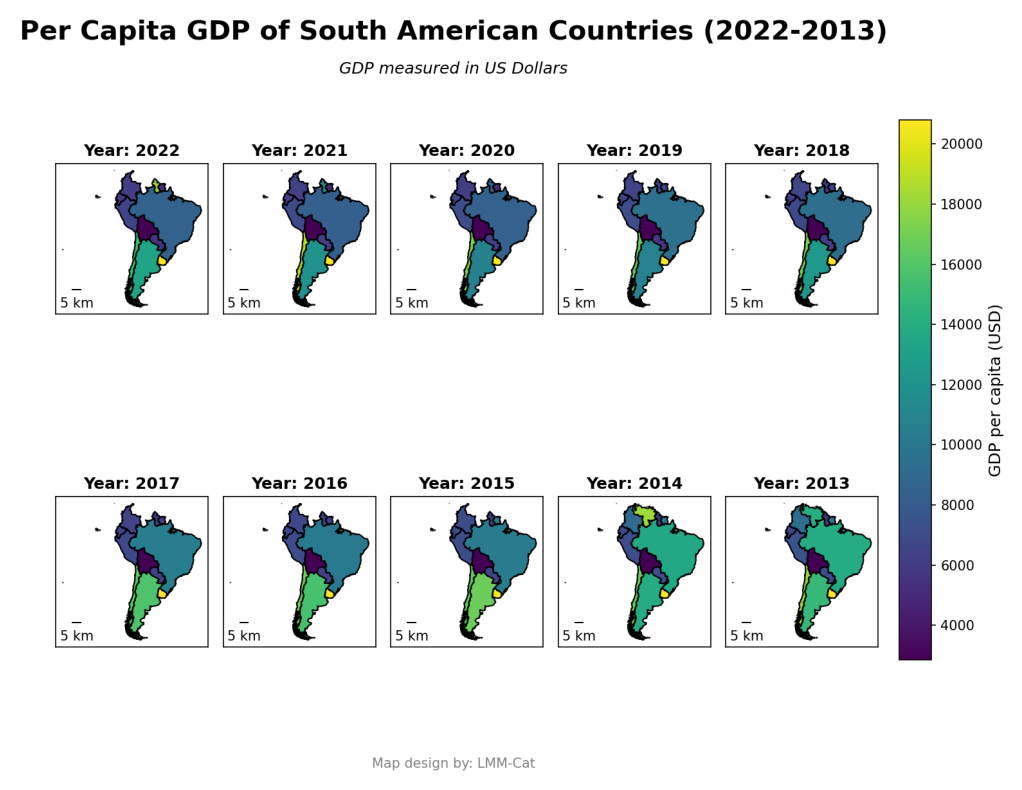

In [35]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 9

Revising the map, trial 1 / 1
**Current map issues:**
1. **Title Placement and Size:** The main title could be larger to emphasize its importance and improve readability from a distance.
2. **Year Labels:** The fontsize of the year labels is uniform. It would be better if they were more prominent and differentiated from other text elements.
3. **North Arrow Representation:** The north arrow is only placed on the first submap; it might be more effective on all or centrally to represent the entire matrix.
4. **Colorbar Placement:** The colorbar currently resides outside the matrix to the right. This positioning is common but might benefit from a resized, more integrated approach that doesn't draw unnecessary attention away from the map content.
5. **Scalebar Clarity:** The scalebar, while present, lacks clear unit designation and could be more prominently featured or replicated across each submap for clarity.
6. **Submap Borders:** The black borders around each submap slightly distract f

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar

def load_gdp_data(gdp_data_path="E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg"):
    return gpd.read_file(gdp_data_path)

def filter_south_america(gdp_gdf):
    return gdp_gdf[gdp_gdf['UN_Geodata_simplified_intreg'] == 'South America']

def create_choropleth_map(gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    fig.subplots_adjust(hspace=0.45, wspace=0.1, top=0.85, bottom=0.1)
    colormap = plt.cm.Purples.reversed()  # Aesthetic change in color map for better visual
    years = [f"country_per_capita_GDP_{year}" for year in range(2022, 2012, -1)]  # adjusted ending year to 2022
    vmin, vmax = gdf[years].min().min(), gdf[years].max().max()

    for i, ax in enumerate(axes.flatten()):
        gdf.plot(column=years[i], ax=ax, cmap=colormap, legend=False, edgecolor='lightgray')
        ax.set_title(f"{2022 - i}", fontsize=16, fontweight='bold')  # adjusted to start from 2022
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_frame_on(False)  # Remove black border
        if i == 0:
            scale_bar = ScaleBar(1, location='lower right', scale_loc='bottom', units='km', frameon=False)
            ax.add_artist(scale_bar)
            ax.annotate('N', xy=(0.1, 0.1), xytext=(0.1, 0.2), arrowprops=dict(facecolor='black', width=1, headwidth=8), fontsize=12)

    fig.suptitle('Per Capita GDP of South American Countries (2022-2013)', fontsize=22, fontweight='bold')
    plt.figtext(0.5, 0.9, 'GDP measured in USD', ha='center', fontsize=14, style='italic')

    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    cbar_ax = fig.add_axes([0.93, 0.2, 0.02, 0.6])  # Adjusted cbar position
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label('GDP per capita (USD)', size=14)

    plt.figtext(0.5, 0.01, 'Map design by: LMM-Cat', horizontalalignment='center', size=12, color='gray', transform=fig.transFigure)

    plt.savefig("output_map.png", bbox_inches='tight', pad_inches=0.2, dpi=150)

def assembly_solution():
    gdp_gdf = load_gdp_data()
    gdf = filter_south_america(gdp_gdf)
    create_choropleth_map(gdf)

assembly_solution()

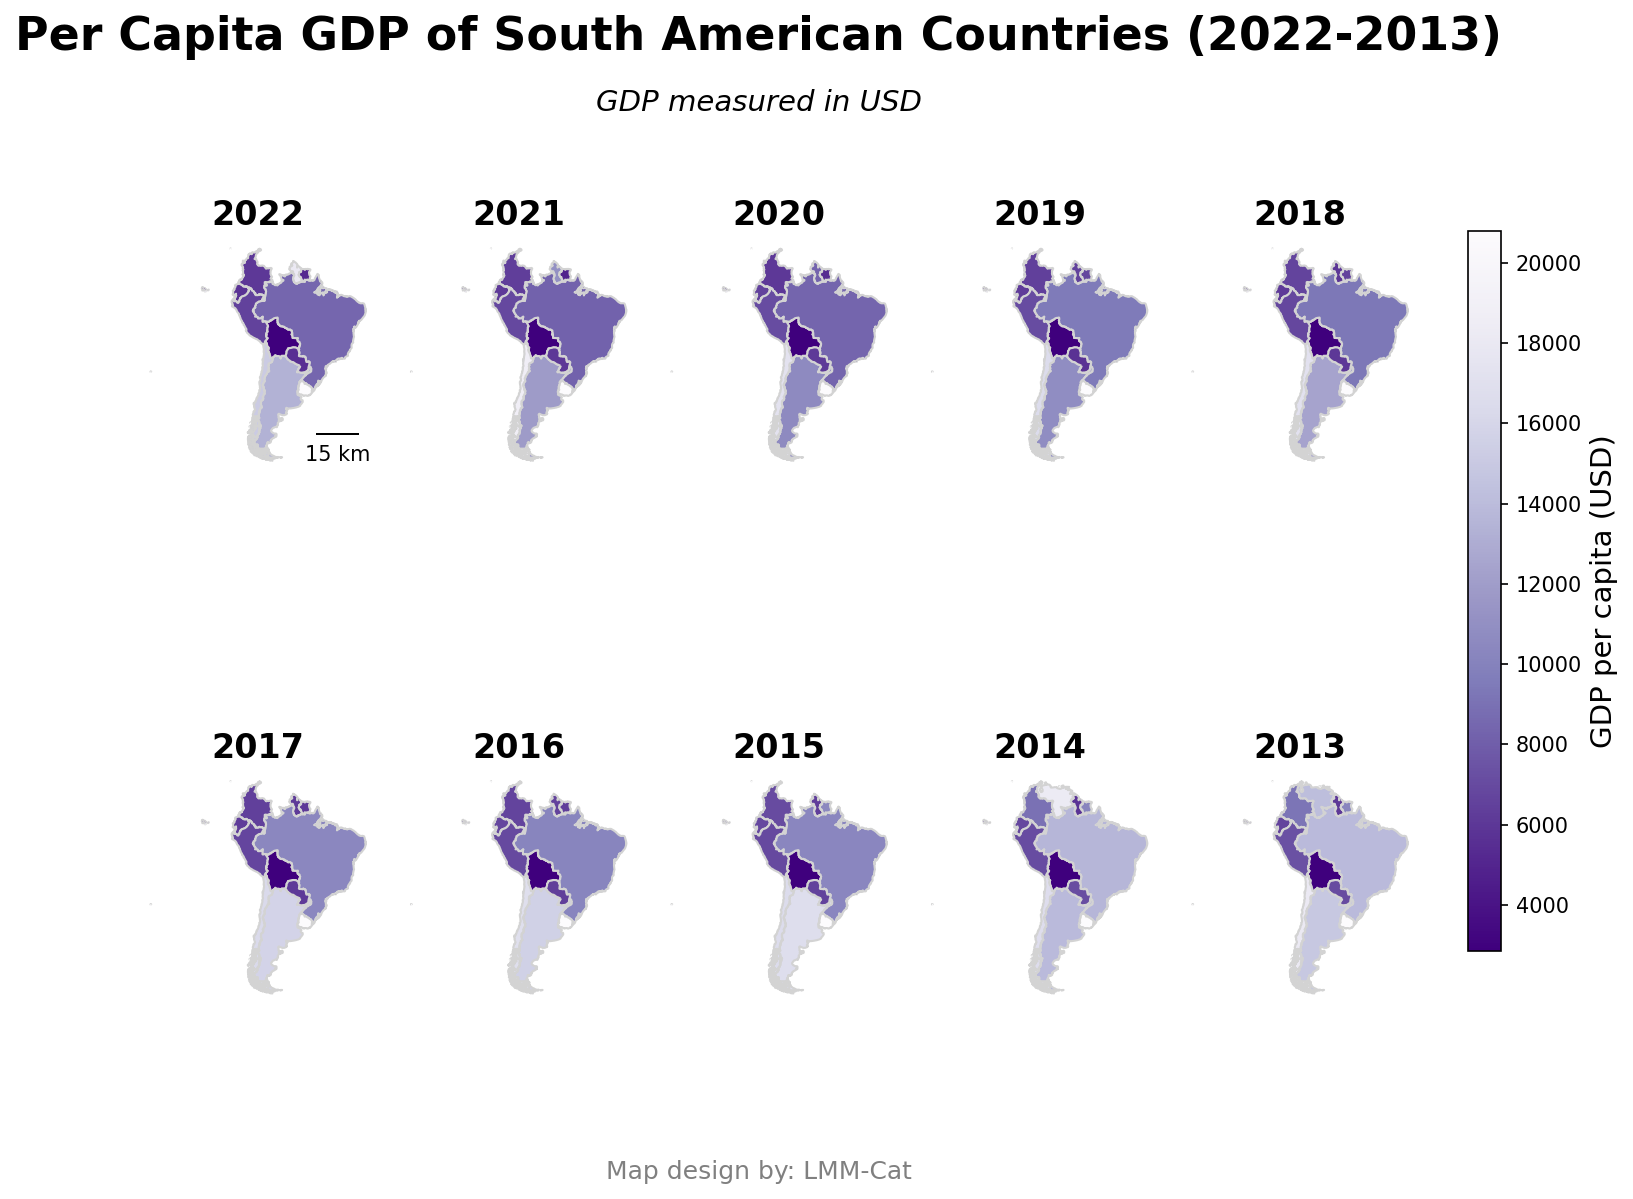

In [39]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 10

Revising the map, trial 1 / 1
### Current Map Issues:
1. **Visualization Clarity**: While the purple color scheme generally works, a more dynamic range or a different palette could enhance visibility and make the map more appealing and easier to interpret.
2. **Title and Subtitle Clarity**: The main title's font is clear but could be more engaging. The subtitle uses italic style which might hinder readability.
3. **North Arrow and Scale Bar**: The north arrow is only present on the first submap, which might be confusing for orientation across other maps. The scale bar should ideally be present in all maps or in a consistent section of the layout for clarity.
4. **Submap Borders**: Although the submaps are without external borders (frame_on=False), adding subtle borders might help in individually highlighting each year without clutter.
5. **Colorbar and Legend Details**: The colorbar is somewhat detached from the matrix of maps. Including units or more detailed breaks could enhance unde

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar

def load_gdp_data(gdp_data_path="E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg"):
    return gpd.read_file(gdp_data_path)

def filter_south_america(gdp_gdf):
    return gdp_gdf[gdp_gdf['UN_Geodata_simplified_intreg'] == 'South America']

def create_choropleth_map(gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    colormap = plt.cm.viridis  # Using 'viridis' colormap for better color grading
    years = [f"country_per_capita_GDP_{year}" for year in range(2022, 2012, -1)]
    vmin, vmax = gdf[years].min().min(), gdf[years].max().max()

    for i, ax in enumerate(axes.flatten()):
        gdf.plot(column=years[i], ax=ax, cmap=colormap, legend=False, edgecolor='k', linewidth=0.1)  # Added edge color and line width
        ax.set_title(f"{2022 - i}", fontsize=14, fontweight='bold')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.annotate('N', xy=(0.9, 0.1), xytext=(0.9, 0.2), arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)  # Consistent north arrow

        scale_bar = ScaleBar(1, location='lower left', scale_loc='bottom', units='km', frameon=False,
                             length_fraction=0.025)  # Consistent scale bar on each map
        ax.add_artist(scale_bar)

    fig.suptitle('Per Capita GDP of South American Countries (2022-2013)', fontsize=24, fontweight='bold')
    plt.figtext(0.5, 0.08, 'GDP measured in USD', ha='center', fontsize=16)

    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.45])  # Refined colorbar placement
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label('GDP per capita (USD)', size=14, weight='bold')

    plt.figtext(0.5, 0.02, 'Map design by: LMM-Cat', horizontalalignment='center', size=12, color='gray', transform=fig.transFigure)

    plt.savefig("output_map.png", bbox_inches='tight', pad_inches=0.2, dpi=150)

def assembly_solution():
    gdp_gdf = load_gdp_data()
    gdf = filter_south_america(gdp_gdf)
    create_choropleth_map(gdf)

assembly_solution()

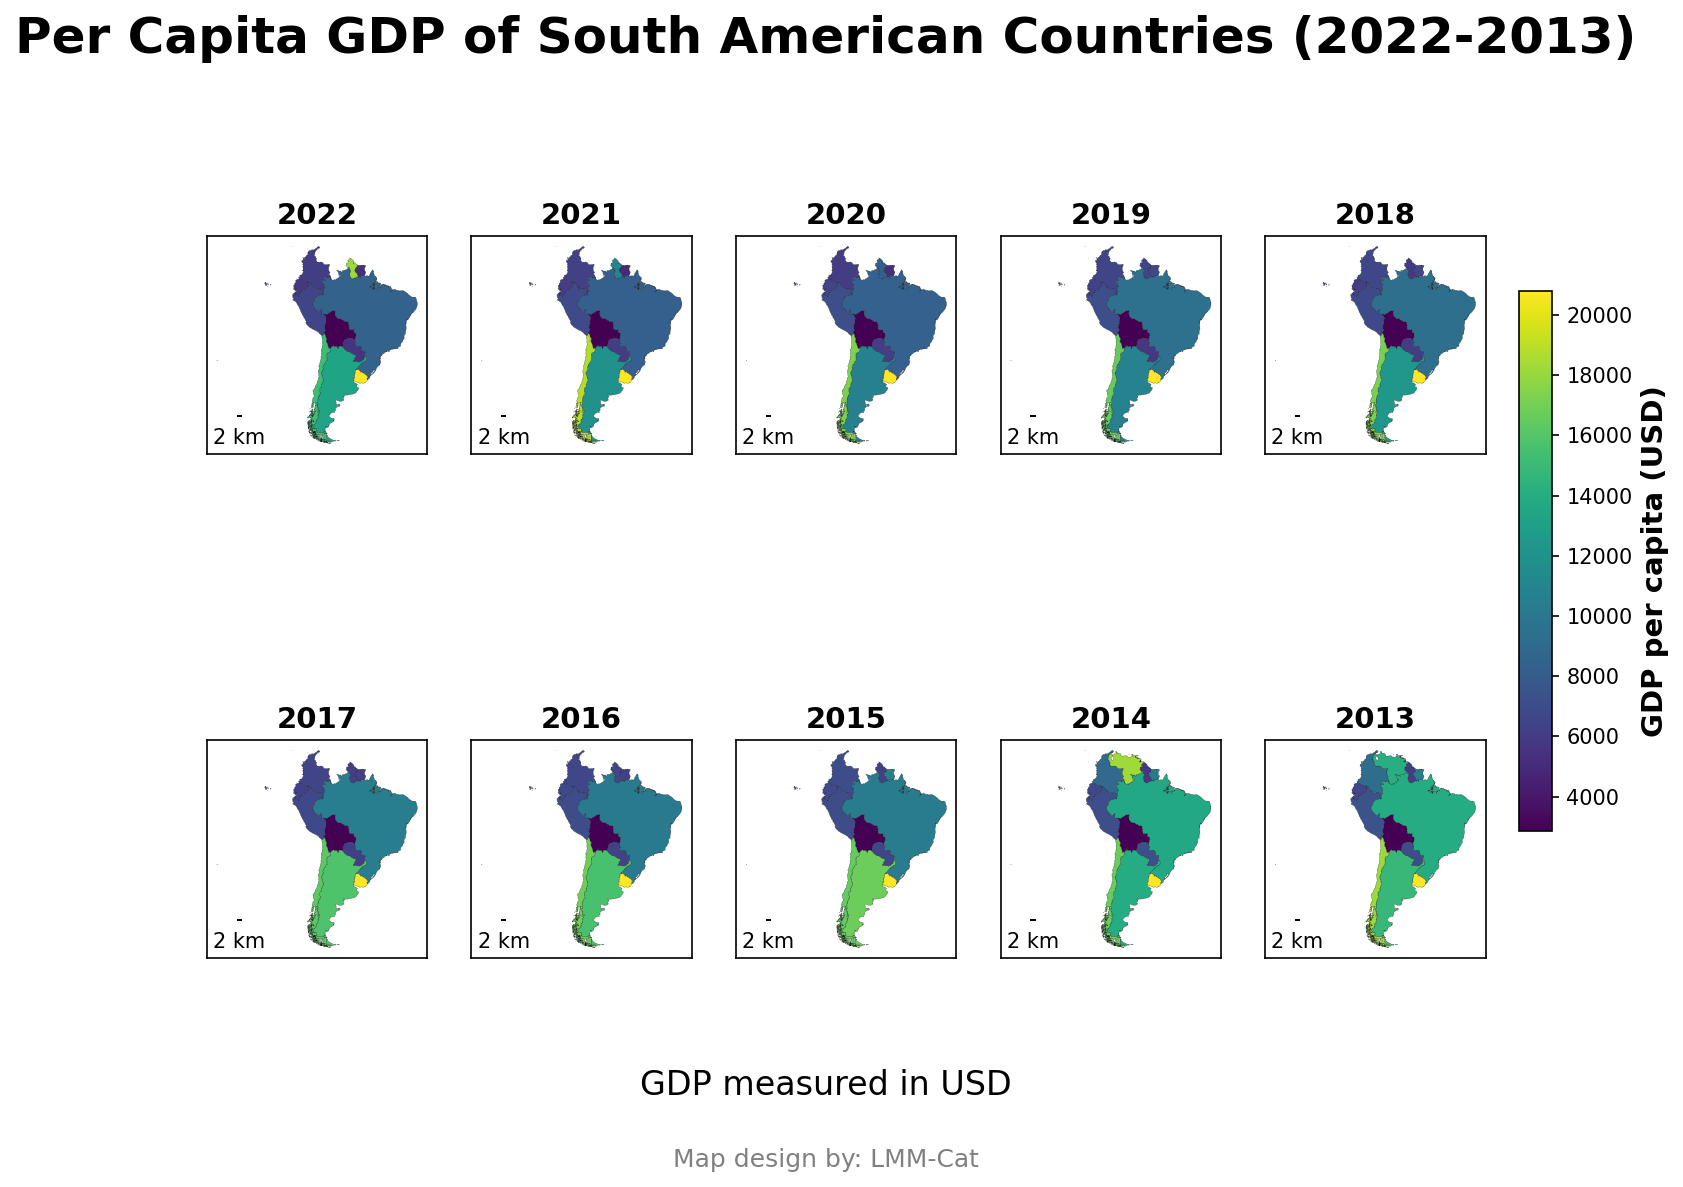

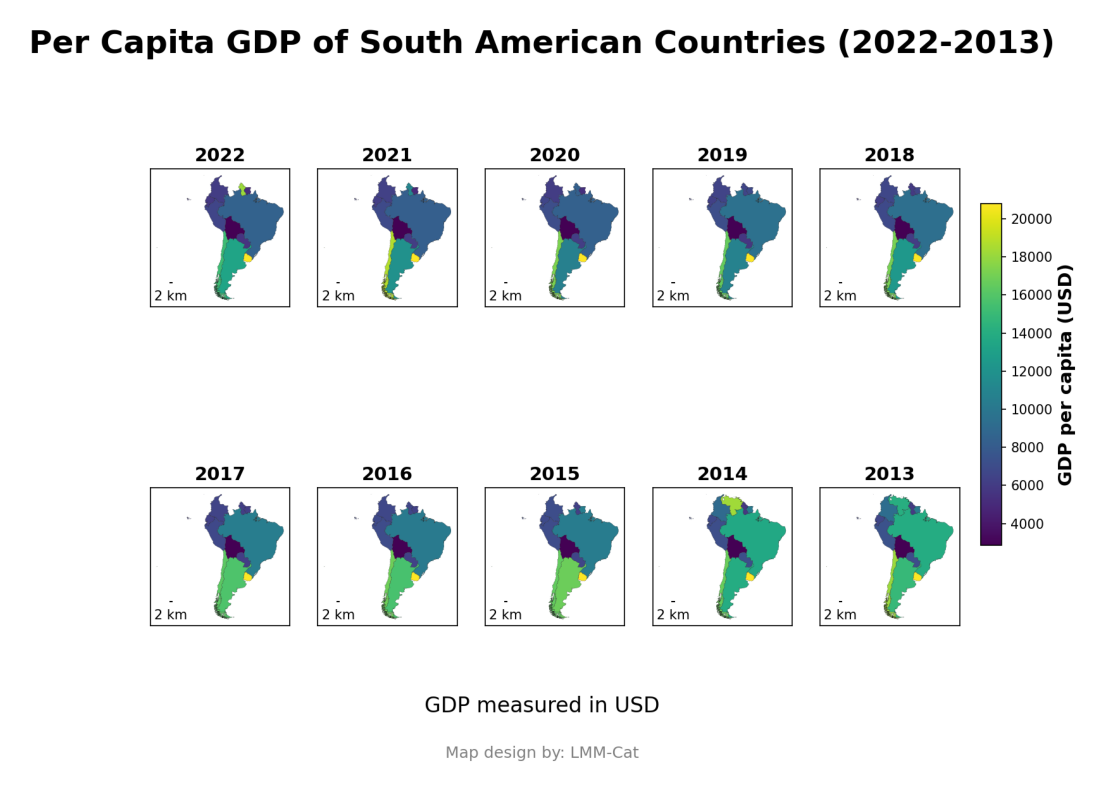

In [41]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

In [28]:
STOP

NameError: name 'STOP' is not defined

# Tools


## load a solution

In [ ]:

# import pickle

# saved_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\Census_map\Census_map.pkl"
# file = open(saved_fname, 'rb')

# solution = pickle.load(file)

# file.close()
# print(solution.task)